# Prediction of Credit Card Approval
 ----------------------------------------------------------------------------
## Introduction
The entire banking sector relies on the practice of borrowing and lending. Banks borrow money from depositors and other sources and lend that money to borrowers who need it.

During the lending process, banks carry out credit analysis to evaluate the creditworthiness of a borrower which helps in risk assessment and getting an overall view of the applicant's financial standing by analyzing the credit history. It also helps in maintaining profitability, minimizing the risk of fraudulent activities, and enhancing the customer experience.

## Importance in today's world:

With the increasing number of credit card applications, banks, and other financial institutions face the challenge of efficiently processing these applications while ensuring that they only approve credit cards for qualified applicants.

This project is aimed to develop an efficient predictive model that can help banks and financial institutions streamline their credit card approval process, mitigating the risk of fraud, and ultimately increase profitability while ensuring fair and responsible lending practices.

## Overview of the dataset
We will work on Credit_card.csv dataset which contains 18 features and 1548 observations. Each observation contains personal, financial, and employment data of an individual. The target variable is binary and is stored in Credit_card_label.csv file.

Out of 18 features 6 are numerical and the rest are categorical. We will explore the dataset further in our analysis.

In target variable, the rejected applications are in extreme minority which indicates class imbalance, and the prediction of these minority classes is one of the main challenges because Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of rejected applications, then there's little data to learn how to identify them.


# Info about Dataset

## 1. Credit_card.csv

## Feature Details:


# 2. Credit_card_label.csv

## 1. Understanding the data

In [1]:
# Libraries for analysis
import numpy as np
import pandas as pd

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Allows charts to appear in the notebook
%matplotlib inline

In [2]:
# Importing the dataset
credit = pd.read_csv('Credit_card.csv')

# Importing the target variable
target = pd.read_csv("Credit_card_label.csv")

In [3]:
# First 5 rows of credit dataset
credit.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
# First 5 rows of target dataset
target.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


# Merging the datasets

In [5]:
# Merging the datasets on common column
credit_card = credit.merge(target,  how ='inner', on='Ind_ID')

# Making a copy of dataset
df = credit_card.copy(deep = True)

In [6]:
# First 5 rows of dataset
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


# Basic Exploration

In [7]:
# Shape of the dataset
print('shape of df dataset')
print('number of rows in df dataset : ' , df.shape[0])
print('number of columns in df dataset : ' , df.shape[1])

shape of df dataset
number of rows in df dataset :  1548
number of columns in df dataset :  19


In [8]:
# Checking the NULL records
null_values = df.isnull().sum()
print('info about null record in dataset') 
null_values

info about null record in dataset


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [9]:
# Checking the NULL records in percentage
null_values = df.isnull().sum()*100/len(df)
print('info about null record in dataset')
null_values

info about null record in dataset


Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

# observations 
colums Type_Occupation , Birthday_count , Annual_income , GENDER have null values 

Now, as we have analyzed the NULL records, let's also check unique values in each column because we want to be sure that there is no unnecessary value present in our dataset in the form of any blank or special characters or other extreme values.

In [10]:
# Number of unique categories
df.duplicated().any()

False

we have no duplicate records

In [11]:
# Checking unique values in each column
df.nunique()*100.0/len(df)

Ind_ID             100.000000
GENDER               0.129199
Car_Owner            0.129199
Propert_Owner        0.129199
CHILDREN             0.387597
Annual_income        7.428941
Type_Income          0.258398
EDUCATION            0.322997
Marital_status       0.322997
Housing_type         0.387597
Birthday_count      82.041344
Employed_days       61.757106
Mobile_phone         0.064599
Work_Phone           0.129199
Phone                0.129199
EMAIL_ID             0.129199
Type_Occupation      1.162791
Family_Members       0.452196
label                0.129199
dtype: float64

# observations
-- column Ind_ID has 100% unique values 
-- Birthday_count , Employed_days also have large number unique values

In [12]:
# Brief description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# observation
--
Out of 6 numerical features, 3 are continuous (Annual_income, Birthday_count, Employed_days) and 3 are discrete (Ind_ID, CHILDREN, Family_Members)

Out of 12 categorical features, except EDUCATION(Ordinal) all other are Nominal variables

In [13]:
# percentage of occurances of approved and rejected applications
df['label'].value_counts()*100/len(df)

0    88.69509
1    11.30491
Name: label, dtype: float64

# observation
The target variable is binary and is highly imbalanced having 88.7% data belonging to Class 0 (Applications Approved) and 11.3% data belonging to Class 1 (Applications Rejected), This need to corrected using sampling techniques before feeding into predictive models

# 2. EDA and Data Preprocessing

In [14]:
# Making the column cases uniform
df.columns = df.columns.map(lambda x : x.lower())
df.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members',
       'label'],
      dtype='object')

# Removing Unnecessary columns
Since we have only 1 category in mobile_phone column. So, let's 
delete this variables as it will not help in predicting the output, 
instead it will only create bias and negatively affect the model.

In [15]:
df.drop(columns='mobile_phone' , inplace=True)

In [16]:
# Setting the index  
df.set_index('ind_id' , drop=True, inplace=True)

In [17]:
# Converting the datatypes of categorical columns to 'category' for performance optimization
cols = ['gender','car_owner','propert_owner','type_income','education','marital_status','housing_type',
        'work_phone','phone','email_id', 'type_occupation', 'label']
df[cols] = df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 5008827 to 5053790
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           1541 non-null   category
 1   car_owner        1548 non-null   category
 2   propert_owner    1548 non-null   category
 3   children         1548 non-null   int64   
 4   annual_income    1525 non-null   float64 
 5   type_income      1548 non-null   category
 6   education        1548 non-null   category
 7   marital_status   1548 non-null   category
 8   housing_type     1548 non-null   category
 9   birthday_count   1526 non-null   float64 
 10  employed_days    1548 non-null   int64   
 11  work_phone       1548 non-null   category
 12  phone            1548 non-null   category
 13  email_id         1548 non-null   category
 14  type_occupation  1060 non-null   category
 15  family_members   1548 non-null   int64   
 16  label            1548 non-null   

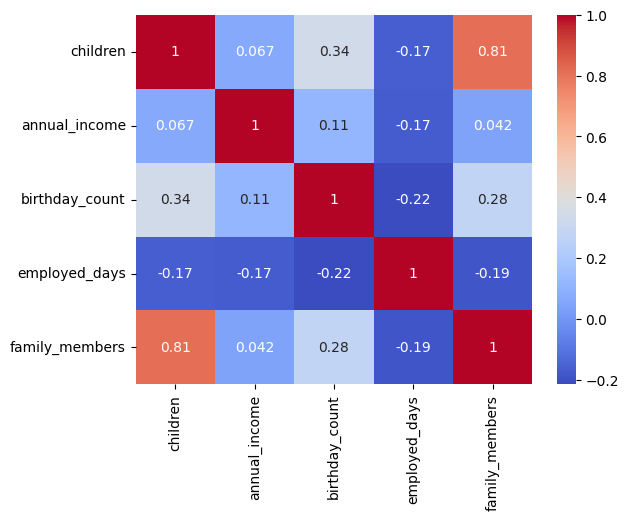

In [18]:
# Correlation matrix for Spearman's Rank Correlation 
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'coolwarm')
plt.show()

# observations 
Here we can observe the strong correlation between children and family_members.

# Univariate Analysis

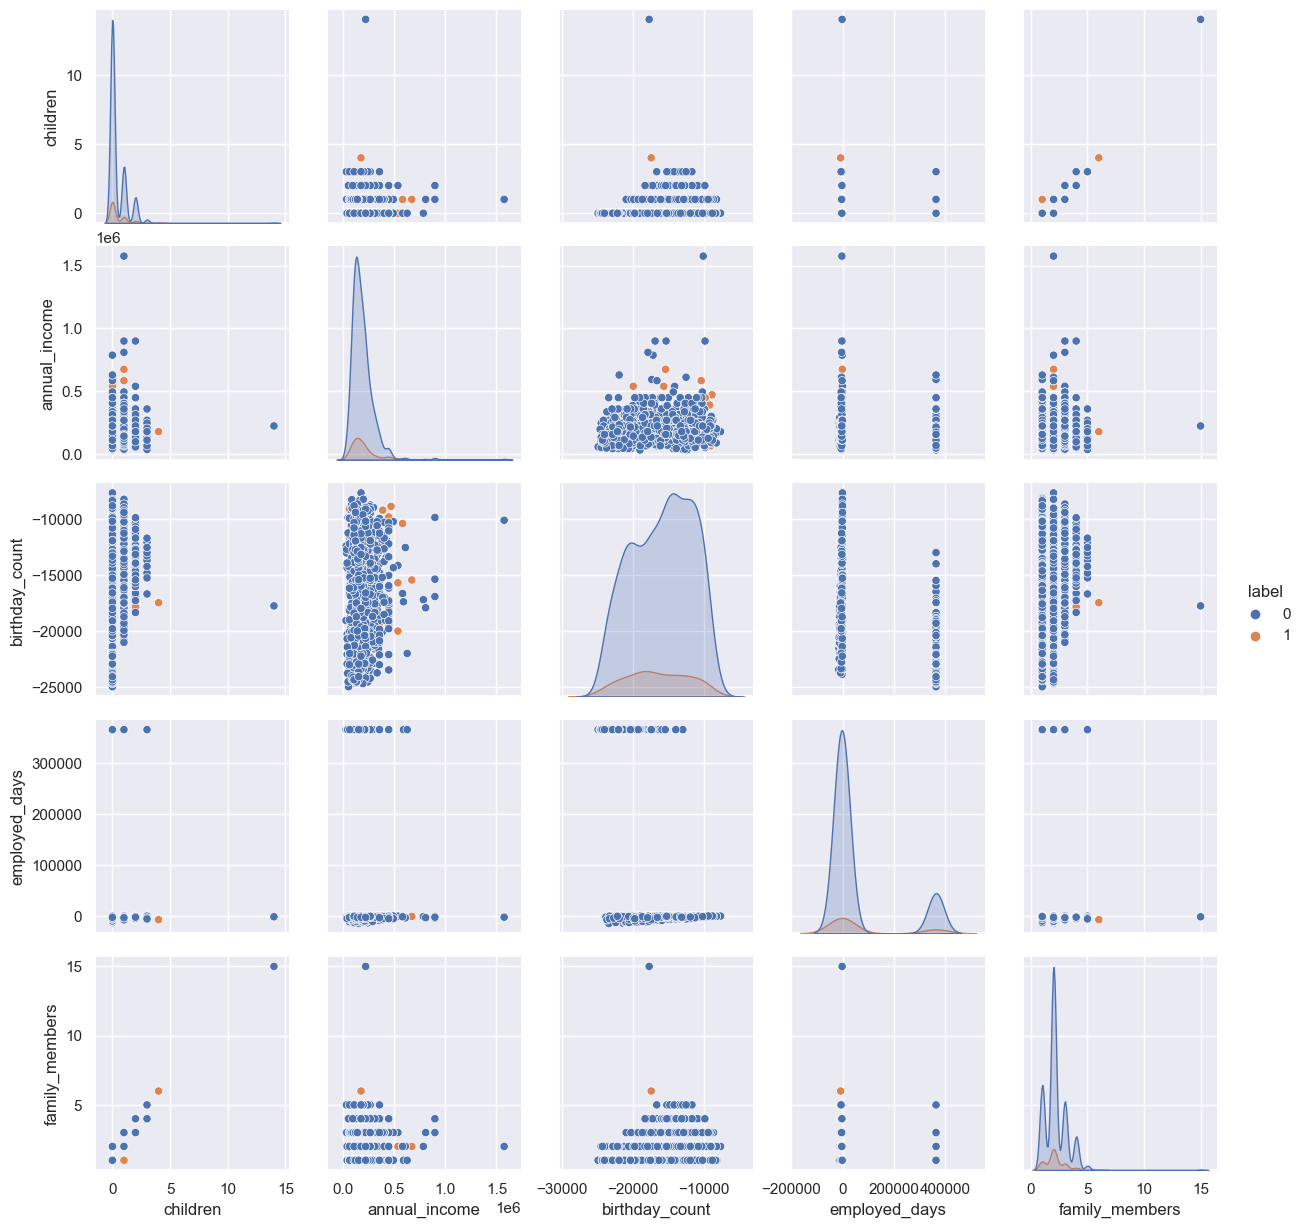

In [19]:
# Setting the plot size
sns.set(rc={'figure.figsize':(20, 20)}, style = 'darkgrid')
# Overall pattern of data 
sns.pairplot(df ,diag_kind = 'kde', hue = 'label')
plt.show()

# observations
1) The scatter plots mostly shows randomness. We can only see the linear relationship between Family Members and number of children, which is obvious because if number of children increases then family size also increases.

2) The distribution of Annual Income is right skewed, birthday_count seems to be normally distributed which we will analyze further and employed_days seems to be right skewed and bimodal.

# Analysis of Categorical data

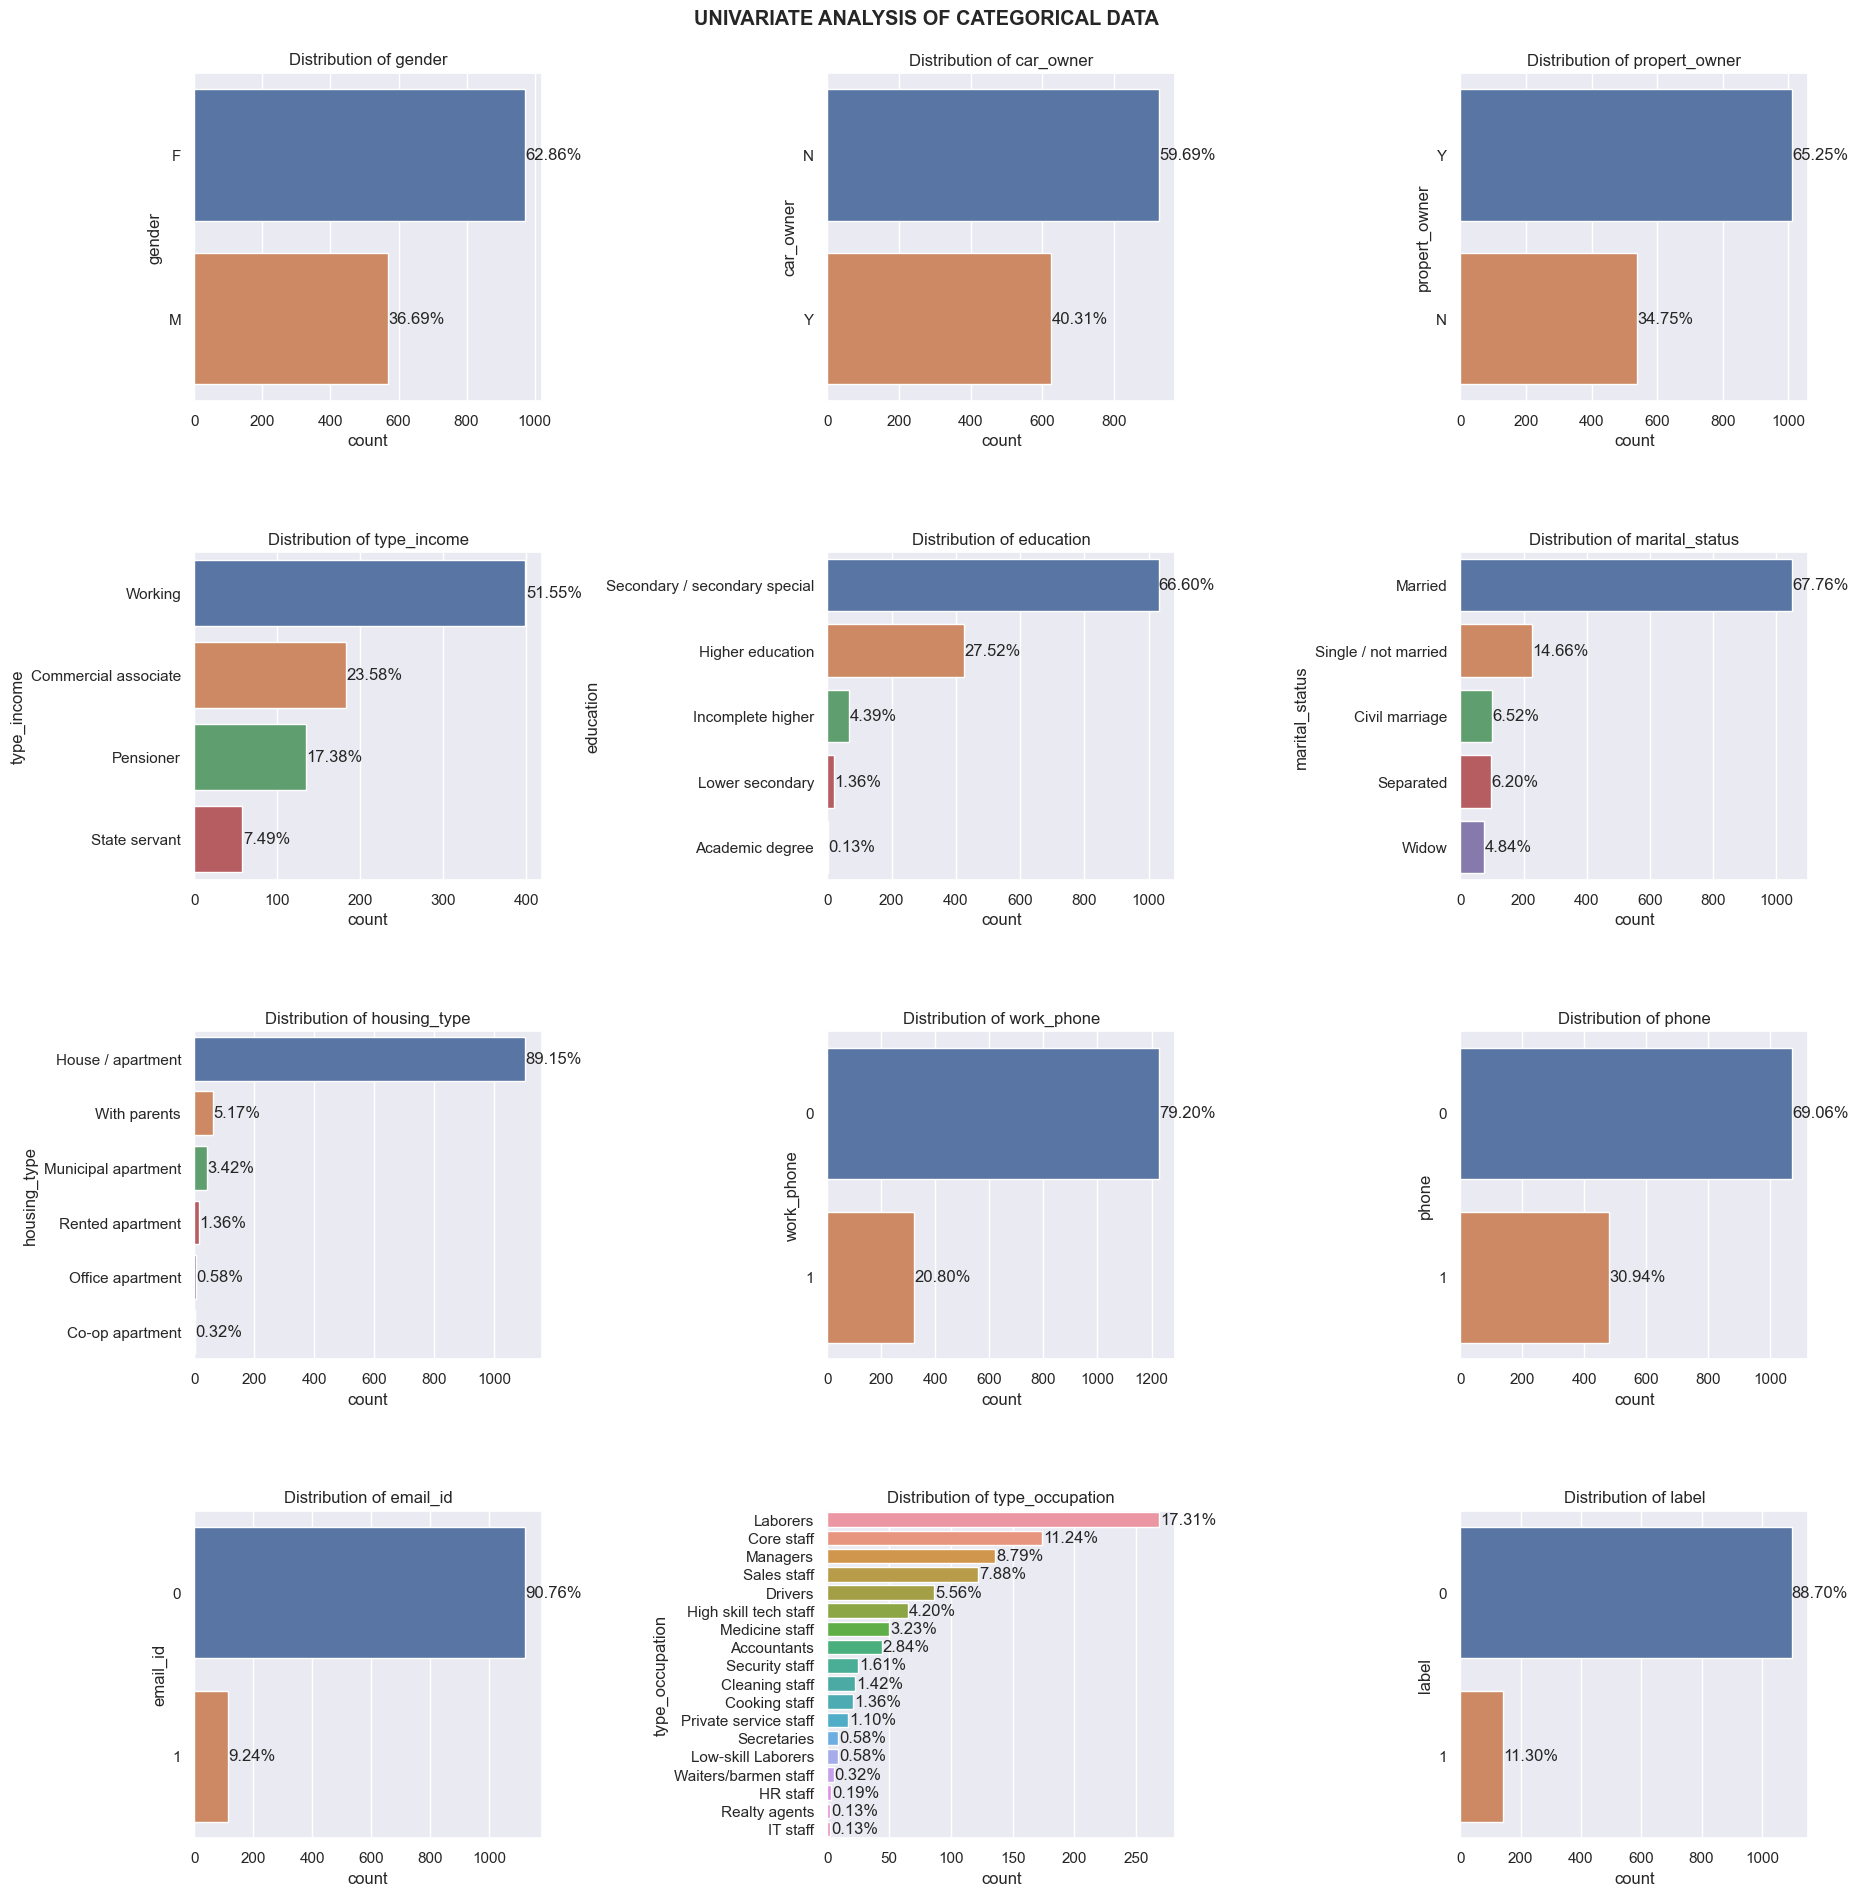

In [20]:
# Univariate analysis of Categorical Columns

fig, axes = plt.subplots(4,3) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0

for i in df.dtypes.items():
    if i[1] == 'category':
        ax = sns.countplot(y=df[i[0]], ax = axes[j], order = df[i[0]].value_counts().index)
        j+=1
        ax.set_xticklabels(ax.get_xticklabels())
        ax.set_title(f"Distribution of {i[0]}")
        
        for k in ax.patches:
            percentage = '{:.2f}%'.format(100 * k.get_width()/len(df))
            x = k.get_y()+ k.get_height()/2
            y = k.get_width()+1
            ax.annotate(percentage, (y, x), va='center')

fig.tight_layout(w_pad=0.5, pad = 5)
fig.suptitle("UNIVARIATE ANALYSIS OF CATEGORICAL DATA", fontweight = 'bold')
plt.show()

Observations: From the above plots we can conclude following points:

1. In the data, we have around 63% females and 37% males.
2. 60% of the individuals don't own any car
3. 65% of the individuals are property owners
4. 51.5% individuals have working income, 24% are commercial associates, 17% are pensioners and 7.5% are state servants.
5. Overall the people have low education background. About 67% of the folks have secondary education, 27% have pursued higher education and only 0.13% have an academic degree.
6. About 68% people are married and 15% are unmarried, 6.5% people have performed civil marriage while about 11% are separated and widowed
7. Maximum people(about 89%) are living in their own houses/apartments, while about 5% are living with parents and the rest are living in municipal apartment or on rent.
8. Maximum people neither have a work phone nor a phone. However, everyone owns a mobile phone
9. 91% people don't have any email id 
10. Most of the individuals are laborers (17.3%), then there are corporate staff (11.2%) and managers (8.8%). HR Staff, Reality agents and IT Staff are least in numbers.

# Analysis of Numerical Data

## Discrete Numerical Data

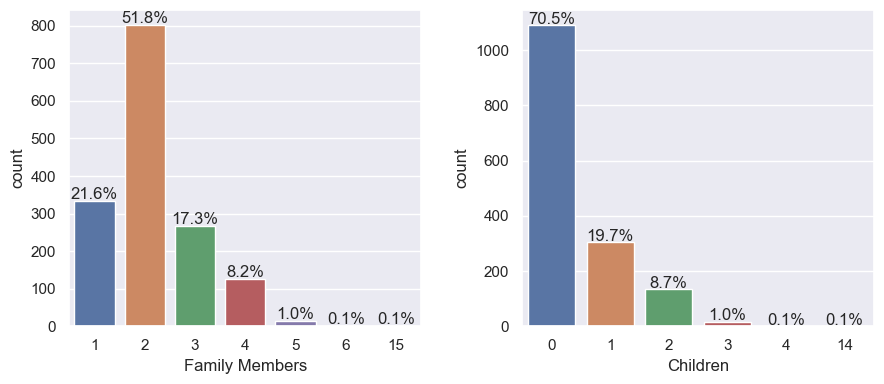

In [21]:
# Setting the figure size
plt.figure(figsize = (9,4))

#Plotting graphs in subplots
plt.subplot(121)
ax = sns.countplot(x = df['family_members'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Family Members")

plt.subplot(122)
ax = sns.countplot(x = df['children'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Children")

plt.tight_layout(w_pad = 2)

# Observations:

1. About 52% individuals have a family of 2 members and most individuals have are living in a family of 1-3 members.
2. About 70% people don't have any children.

# Continuous Numerical Data

Now, earlier in Pairplot analysis we have observed that employed_days column has certain amount of extreme values which differ greatly from the regular pattern of the data.

In [22]:
df['employed_days'].value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: employed_days, Length: 956, dtype: int64

If we observe the employed_days variable then we will find that there are some extreme positive values which are affecting the regular pattern of the data. Since, positive values indicate that the individual is unemployed so we can simply replace those values with +1 which will help in preserving the pattern of the data.

In [23]:
# Replacing extreme values of employed days to 1
df.loc[df['employed_days'] > 0 , 'employed_days'] = 1

In [24]:
df['employed_days'].value_counts()

 1       261
-586       6
-622       5
-460       5
-1678      5
        ... 
-3034      1
-1324      1
-3112      1
-2959      1
-2859      1
Name: employed_days, Length: 956, dtype: int64

<Figure size 500x400 with 0 Axes>

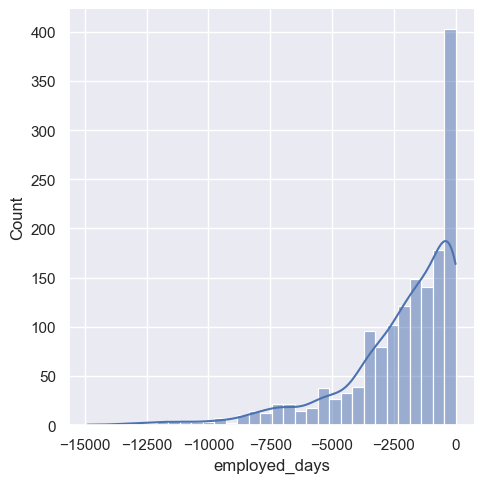

In [25]:
# Checking the distrbution after replacing extreme values
plt.figure(figsize = (5,4))
sns.displot(x='employed_days' , data = df , kde = True )
plt.show()

Now, it looks better but yes, there are certain outliers which we will deal later in our analysis.

If we look at employed_days and birth_count columns, they are only justifying the Work Experience and Age of an individual respectively. So, let's convert these columns which will help in clear understanding and ease in analysis.

In [26]:
# Creating new columns by extracting data from other feartures
df['work_experience'] = np.ceil(-df['employed_days'] / 365.25) #Converting days to years
# to handle -0.0 
df['work_experience'] = np.where(df['work_experience'] == -0 , 0 , df['work_experience'])

df['age'] = np.ceil(-df['birthday_count'] / 365.25) #Converting days to years

In [27]:
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,type_occupation,family_members,label,work_experience,age
ind_id,,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,1,0,0,0,NaN,2,1,0.0,52.0
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1,2.0,NaN
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0
5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0


Now, we have actually performed a part feature engineering by extracting data from other features.

Let's check the difference in skewness of older and new variables

In [28]:
# Skewness values of original columns and Extracted columns
print(f"Skewness of Employed_Days :{df['employed_days'].skew()}")
print(f"Skewness of Work Experience  :{df['work_experience'].skew()}")
print(f"Skewness of Birthday_Count  :{df['birthday_count'].skew()}")
print(f"Skewness of Age  :{df['age'].skew()}")

Skewness of Employed_Days :-1.7296023658309658
Skewness of Work Experience  :1.661916218120766
Skewness of Birthday_Count  :-0.17108666821145055
Skewness of Age  :0.17159161366119227


Not much difference can be seen, just the magnitude is changed.

Now, that we have created new columns, we will delete the older ones in order to avoid multicollinearity issue.

In [29]:
df.drop(columns = ['birthday_count', 'employed_days'], inplace = True)

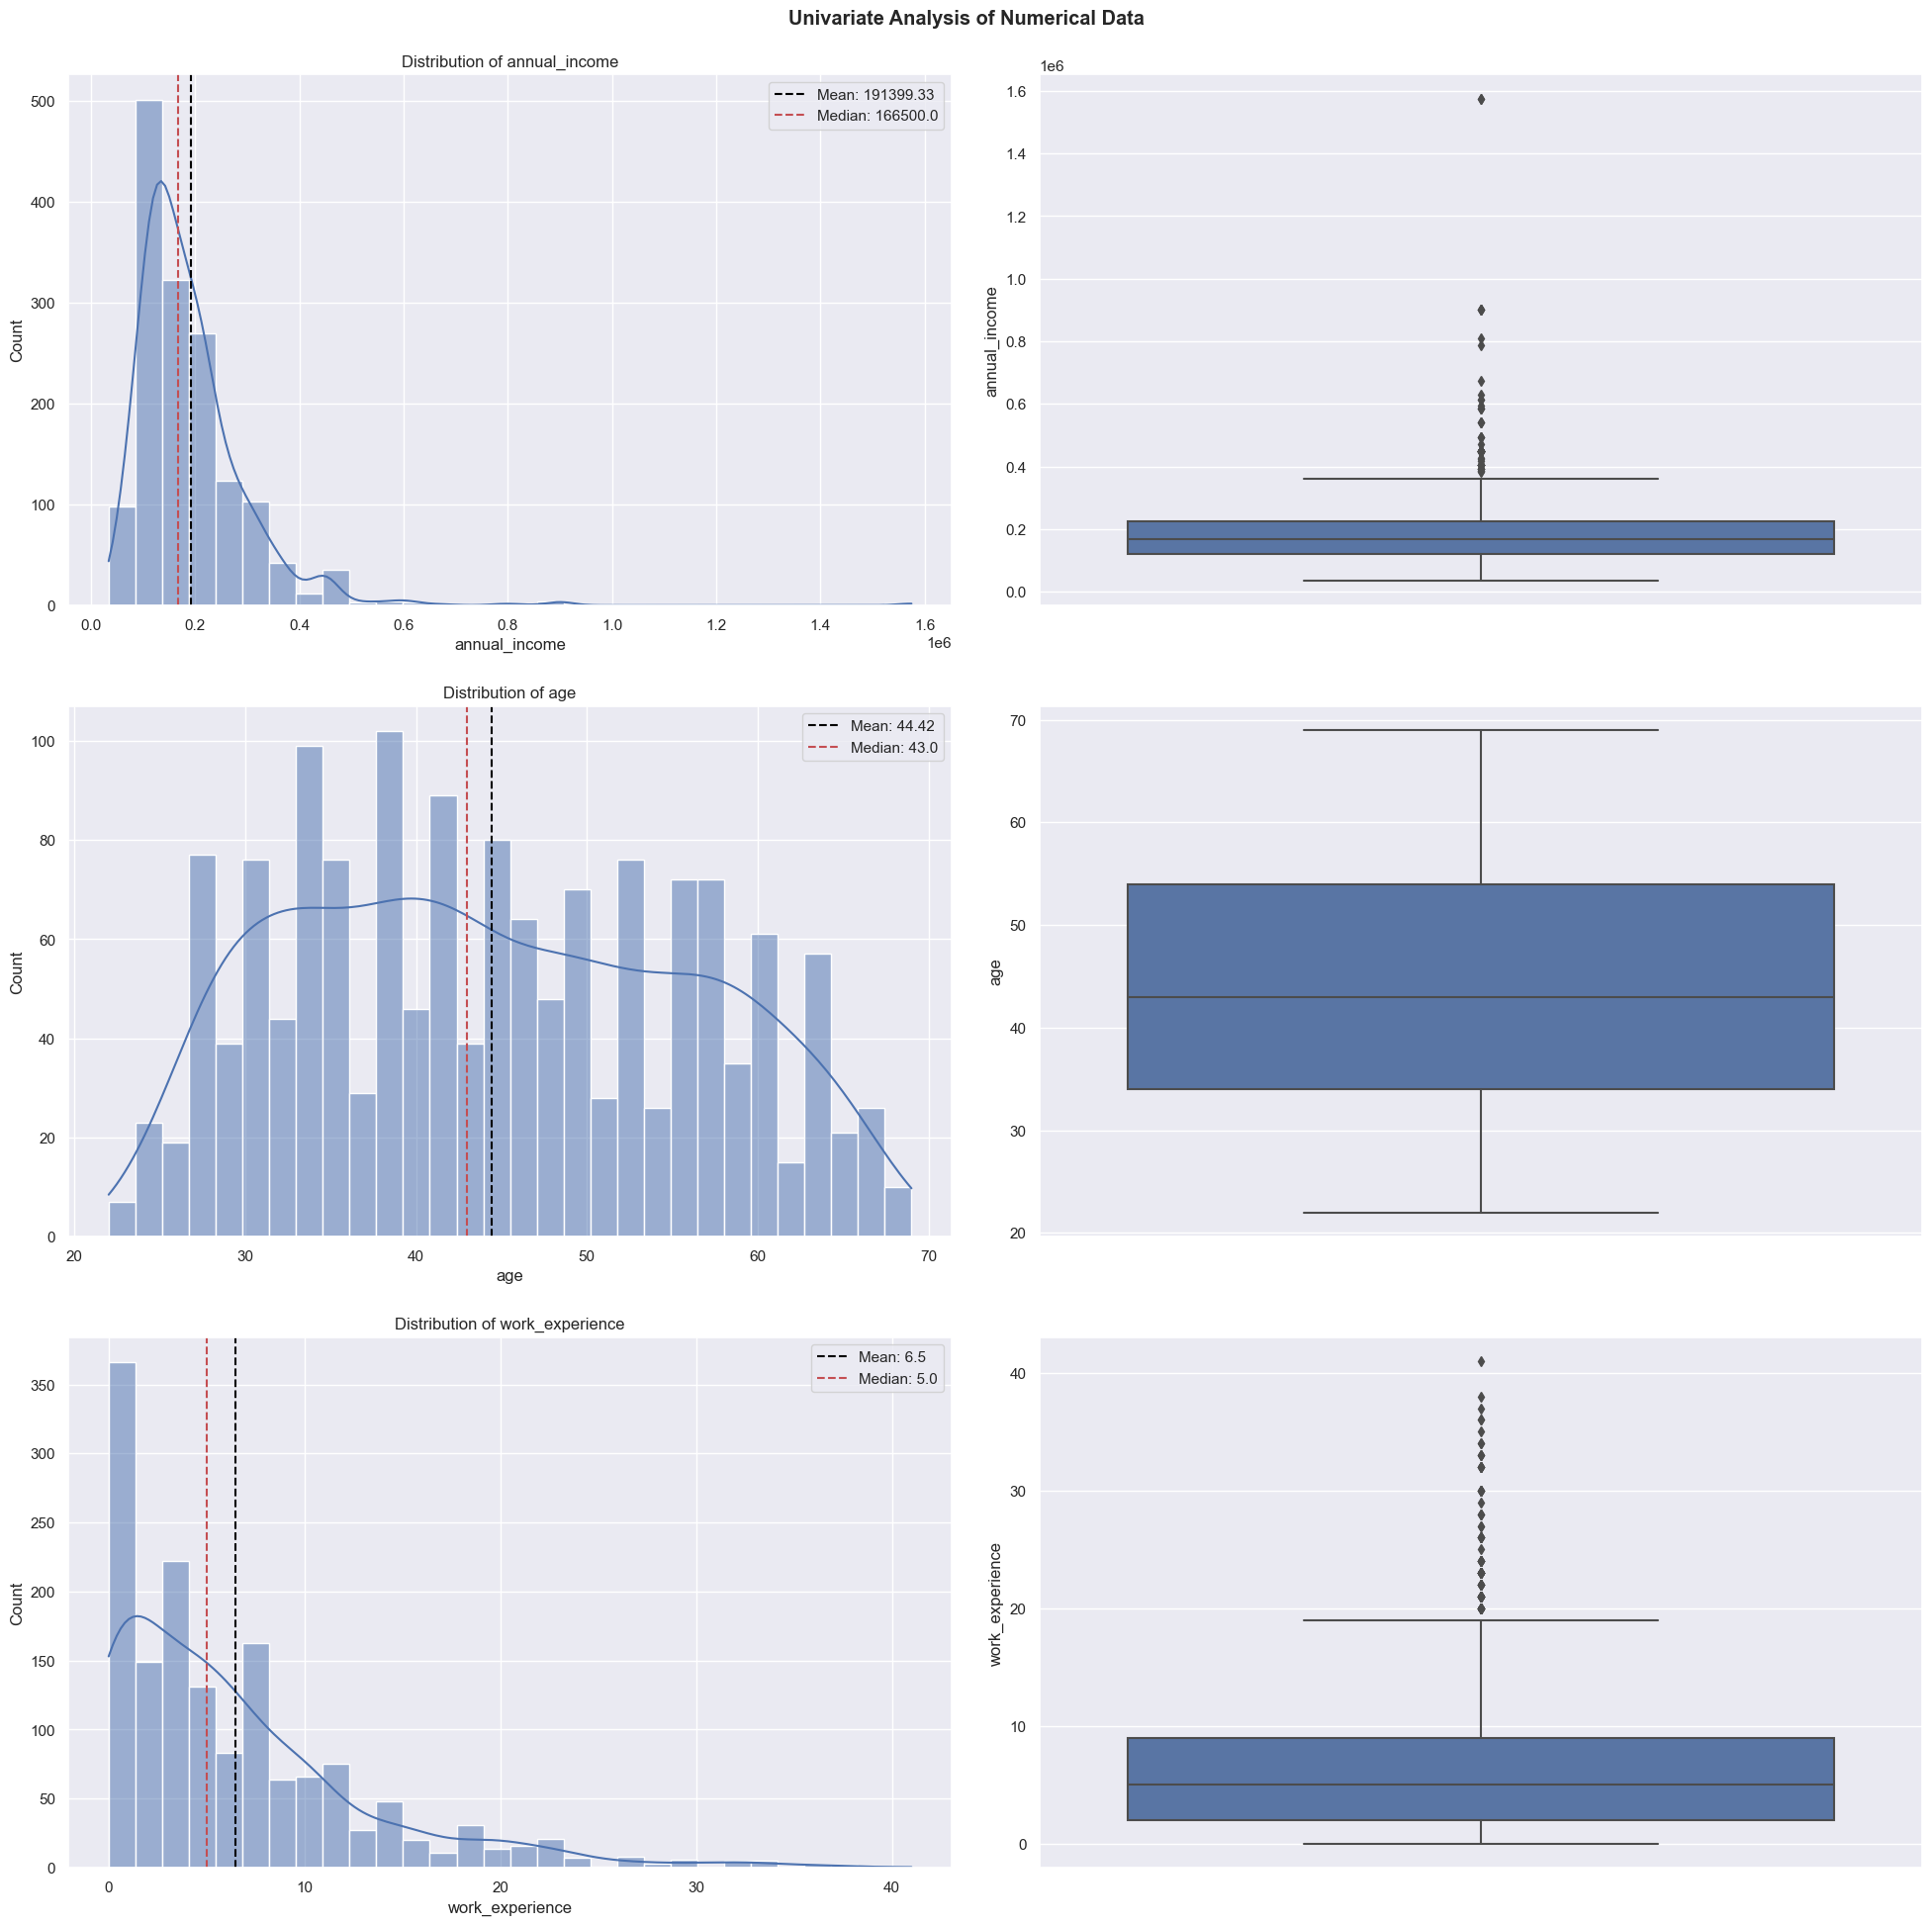

In [30]:
cols = ['annual_income','age', 'work_experience']

fig, axes = plt.subplots(3,2) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0
k = 1

for i in df[cols].dtypes.items():
    ax = sns.histplot(x=df[i[0]], ax = axes[j], kde = True, bins = 30)
    ax.axvline(x = df[i[0]].mean(), c= 'black', ls = '--', label =f"Mean: {round(df[i[0]].mean(), 2)}")
    ax.axvline(x = df[i[0]].median(), c= 'r', ls = '--', label =f"Median: {round(df[i[0]].median(), 2)}")
    ax.set_title(f"Distribution of {i[0]}")
    ax.legend()
    
    j+=2

for i in df[cols].dtypes.items():
    ax= sns.boxplot(y = df[i[0]], ax = axes[k])
    k+=2
    
plt.suptitle("Univariate Analysis of Numerical Data", fontweight ='bold')
plt.tight_layout(w_pad = 2, pad = 2)
plt.show()

# Observations:

1. Distribution of Annual Income and Work Experience is Right skewed having skewness of +3.924 and +1.66 respectively. We need to apply some transformations to make the distributions normally distributed before going to modelling stage.
2. From the distribution of Work Experience, it can be clearly seen that majority of the individuals are unemployed and most individuals have less than 10 years of working experience.
3. Age is almost normally distributed having no outliers.

# Bivariate and Multi-variate Analysis

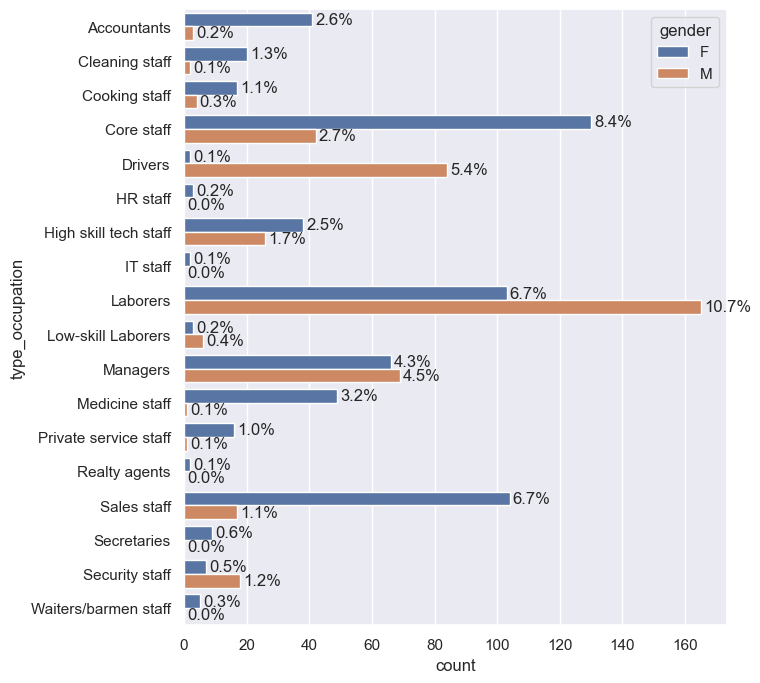

In [31]:
# Checking the distrubution of occupation type by gender
plt.figure(figsize = (7, 8)) # Setting the figure size
ax = sns.countplot(y = 'type_occupation', hue = 'gender' , data = df )

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')

# Observations:
1. Laborers, low-skilled laborers, Drivers, Security Staff have higher male involvement compared to females. Also, there are slighly more male managers compared to females.
2. In core staff jobs, females presence is more than 3 times than as of males and, maximum females are core staff.
3. There are equal number of females in Sales staff and Laborers.
4. Sales staff has a high Female to Male ratio where number of females are more than 6 times than those of males.
5. Occupations like Secretaries, Waiters/Barmen Staff, Reality Agents, Private Service Staff, Medicine Staff, IT Staff, HR Staff, Cleaning Staff, Accountants have zero to very less male involement.
6. Females are present in all type of occupations.

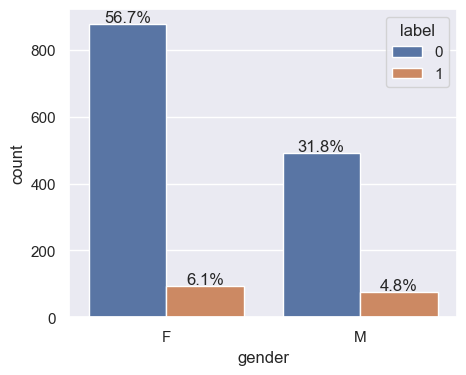

In [32]:
# Checking the distribution of gender by label
sns.set(rc = {'figure.figsize': (5,4)}) # Setting the figure size
ax = sns.countplot(x= 'gender', hue = 'label' , data = df )

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Observations:

1. Rejected applications are higher in females compared to males.
2. Since, the number of females are higher in the data the accepted application are also higher.

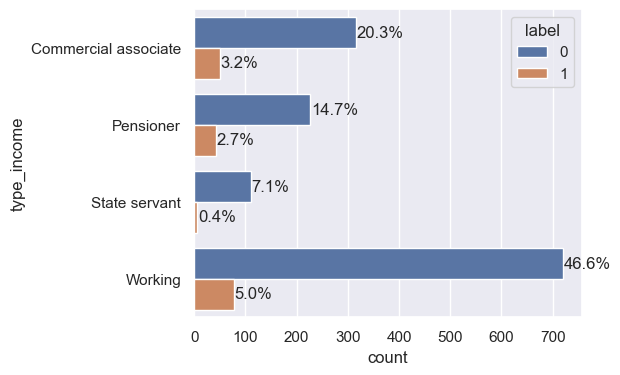

In [33]:
# Checking the distribution of type_income by label
ax = sns.countplot(y= 'type_income' , hue= 'label' , data = df )

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df['type_income']))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')

plt.show()

# Observations:

1. Most of the individuals are working, so their accepted and rejected rate is higher.
2. State Servant category has the highest accepted to rejected application ratio and then comes the working category individuals.
3. Pensioner category has the lowest accepted to rejected applications ratio.

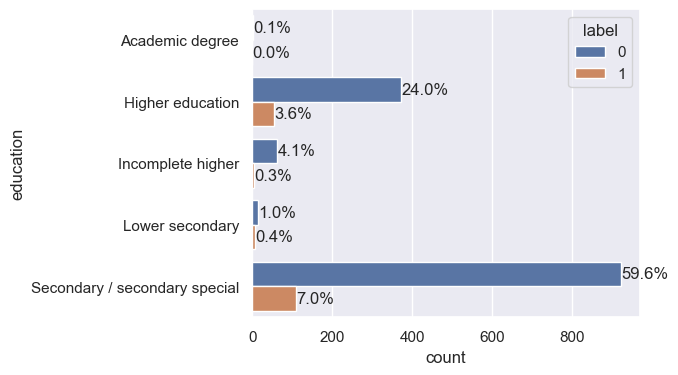

In [34]:
# Checking the distribution of education by label
ax = sns.countplot(y= 'education', hue= 'label' , data= df )

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')
    
plt.show()

# Observations:
1. No applications were rejected for academic degree holders
2. Individuals having lower secondary education have the lowest accepted to rejected applications ratio, which indicates that if a person is having lower secondary education background, then there are higher chances of the application being rejected
3. Most applications were rejected for secondary education category, which is certainly due to majority reason.

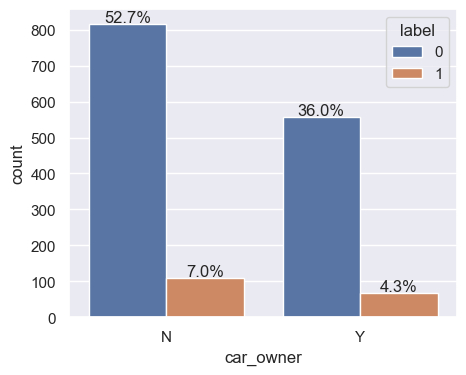

In [35]:
# Checking the distribution of car_owner by label
ax= sns.countplot(x='car_owner' , hue= 'label' , data= df )

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Observations:

1. Persons not having a car have higher rejection rate.
2. Those who own a car have higher chances of credit applications to be accepted.

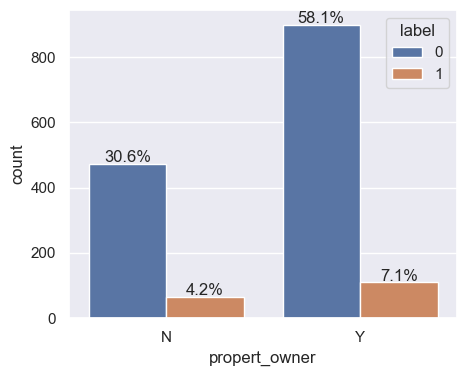

In [36]:
# Checking the distribution of propert_owner by label
ax = sns.countplot(x= 'propert_owner' , hue= 'label' , data = df )

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Observations:

1. Individuals owning a property have a higher rejection rate.
2. But, the accepted to rejected applications ratio is also higher, which indicates people owning a property have a higher chances of approval of credit applications.

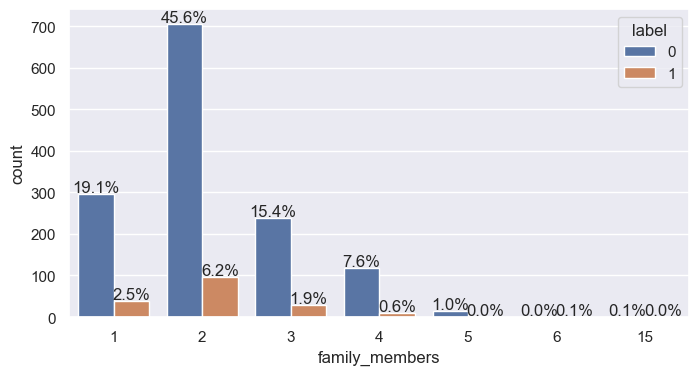

In [37]:
# Checking the distribution of family_members by label
plt.figure(figsize = (8,4)) # Setting the figure size
ax= sns.countplot(x= 'family_members', hue= 'label' , data = df )

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Observations:

1. No clear indication can be made for the reason of accepted and rejected applications from the graph.
2. Individuals living in a family of 2 members have highest rejected applications.
3. All applications were accepted for a family of 5 members.
4. Individuals having a family of 4 members have higher accepted to rejected applications ratio compaered to other major catergory of members.

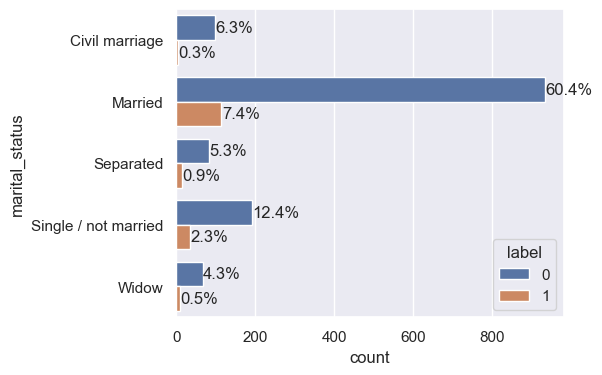

In [38]:
# Checking the distribution of marital_status by label
ax = sns.countplot(y= 'marital_status', hue= 'label' , data = df )

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')
    
plt.show()

# Observations:

1. Married individuals have highest rejected applications. This is certainly due to majority reason.
2. Individuals having Civil Marriage have highest accepted to rejected applications ratio. This indicates that people having civil marriage have highest chances of approval of credit card application.
3. Single individuals have lowest accepted to rejected applications ratio.

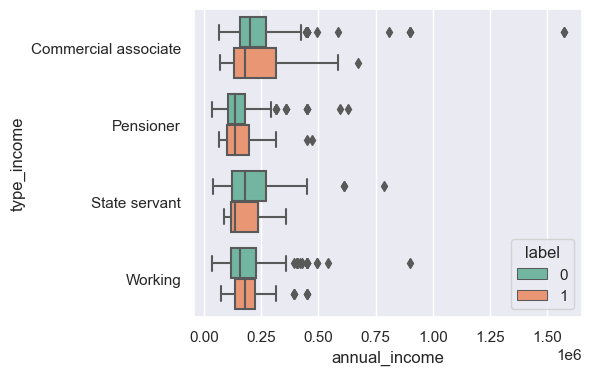

In [39]:
# Distribution of annual income by category for each label
sns.boxplot(x= 'annual_income', y= 'type_income', hue = 'label', data= df,palette = 'Set2')
plt.show()

# Observations:

1. Not much variation can be seen in the distribution of annual incomes of accepted and rejected applicants.
2. However, Commercial associates have higher annual income compared to the all other categories. They also have more extreme outliers.
3. The median income of rejected applicants seems to be more or less same as the median income of accepted applicants of the same category. State servants whose applications were rejected have lower annual income than those of accepted applicants of the same category

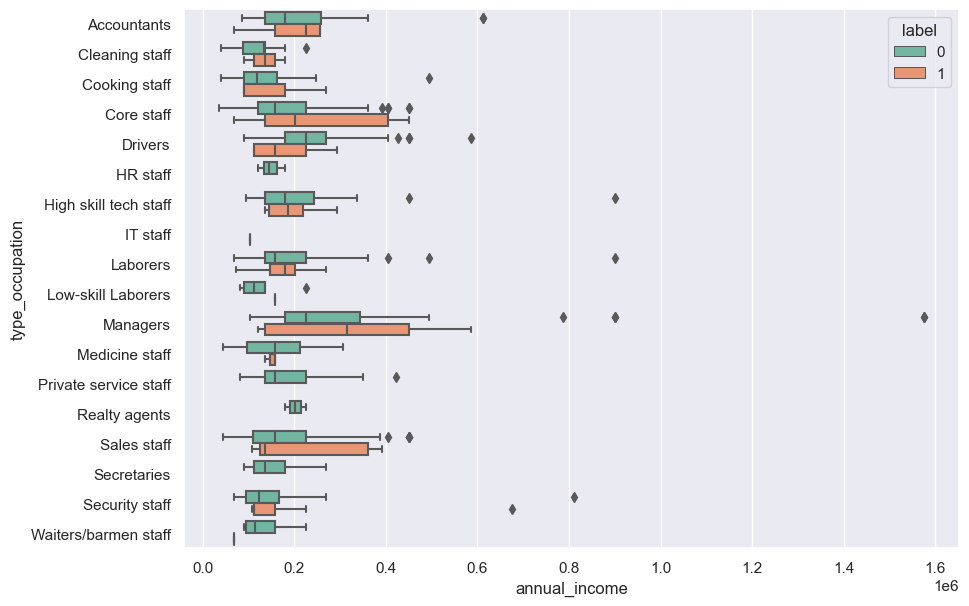

In [40]:
# Comparison of annual income by occupation type for each label
plt.figure(figsize = (10,7))
sns.boxplot(x= 'annual_income', y= 'type_occupation', hue = 'label', data  = df , palette = 'Set2')
plt.show()

# Observations:

1. Managers having rejected credit card applications have highest median annual income and more variation can be seen in the distribution.
2. More extreme outliers can also be seen for annual income of Managers.
3. There is no clear indication that an application got rejected due to lower annual income, because in most of the scenarios the median annual income of rejected applications are higher or nearly same than those of accepted applications.

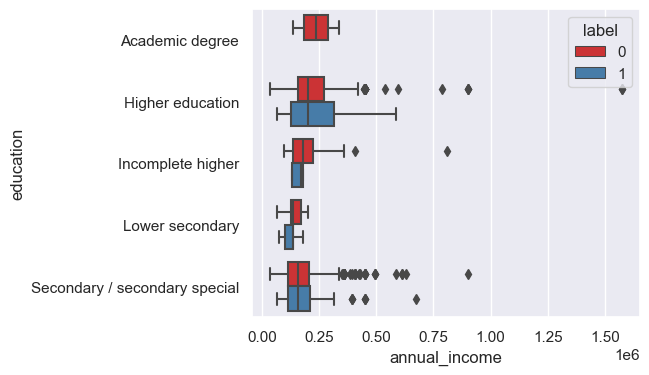

In [41]:
# Distribution of annual income by education for each label
sns.boxplot(x= 'annual_income', y= 'education', hue = 'label', data= df , palette = 'Set1')
plt.show()

# Observations:

1. Except Lower secondary education all other categories have almost same median annual income for accepted and rejected applications.
2. Maximum outliers can be seen in Secondary/secondary special education category.
3. No applications were rejected for academic degree holders.
4. Rejected applications in lower secondary education category have least median annual income.

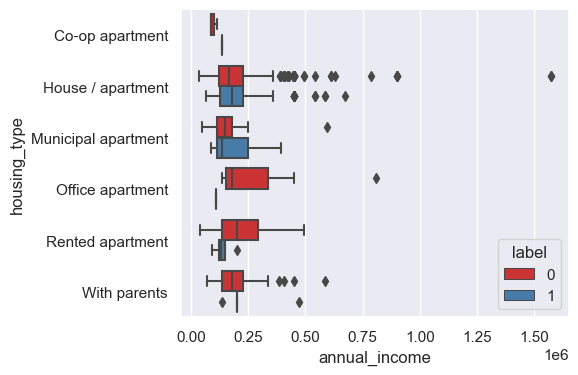

In [42]:
# Distribution of annual income by housing type for each label
sns.boxplot(x= 'annual_income', y= 'housing_type', hue = 'label', data = df , palette = 'Set1')
plt.show()

# Observations:

1. From above plot we can observe that there is no pattern in the annual income of accepted and rejected applications for each category of housing type.
2. More extreme outliers can be seen in the House/apartment category of accepted applications.

# Handling Missing Values
We will start dealing with the missing values by first splitting the dataset in order to prevent data leakage.

## Overview of Missing Values

In [43]:
# Percentage of missing values
df.isnull().mean()*100

gender              0.452196
car_owner           0.000000
propert_owner       0.000000
children            0.000000
annual_income       1.485788
type_income         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
work_phone          0.000000
phone               0.000000
email_id            0.000000
type_occupation    31.524548
family_members      0.000000
label               0.000000
work_experience     0.000000
age                 1.421189
dtype: float64

<AxesSubplot: >

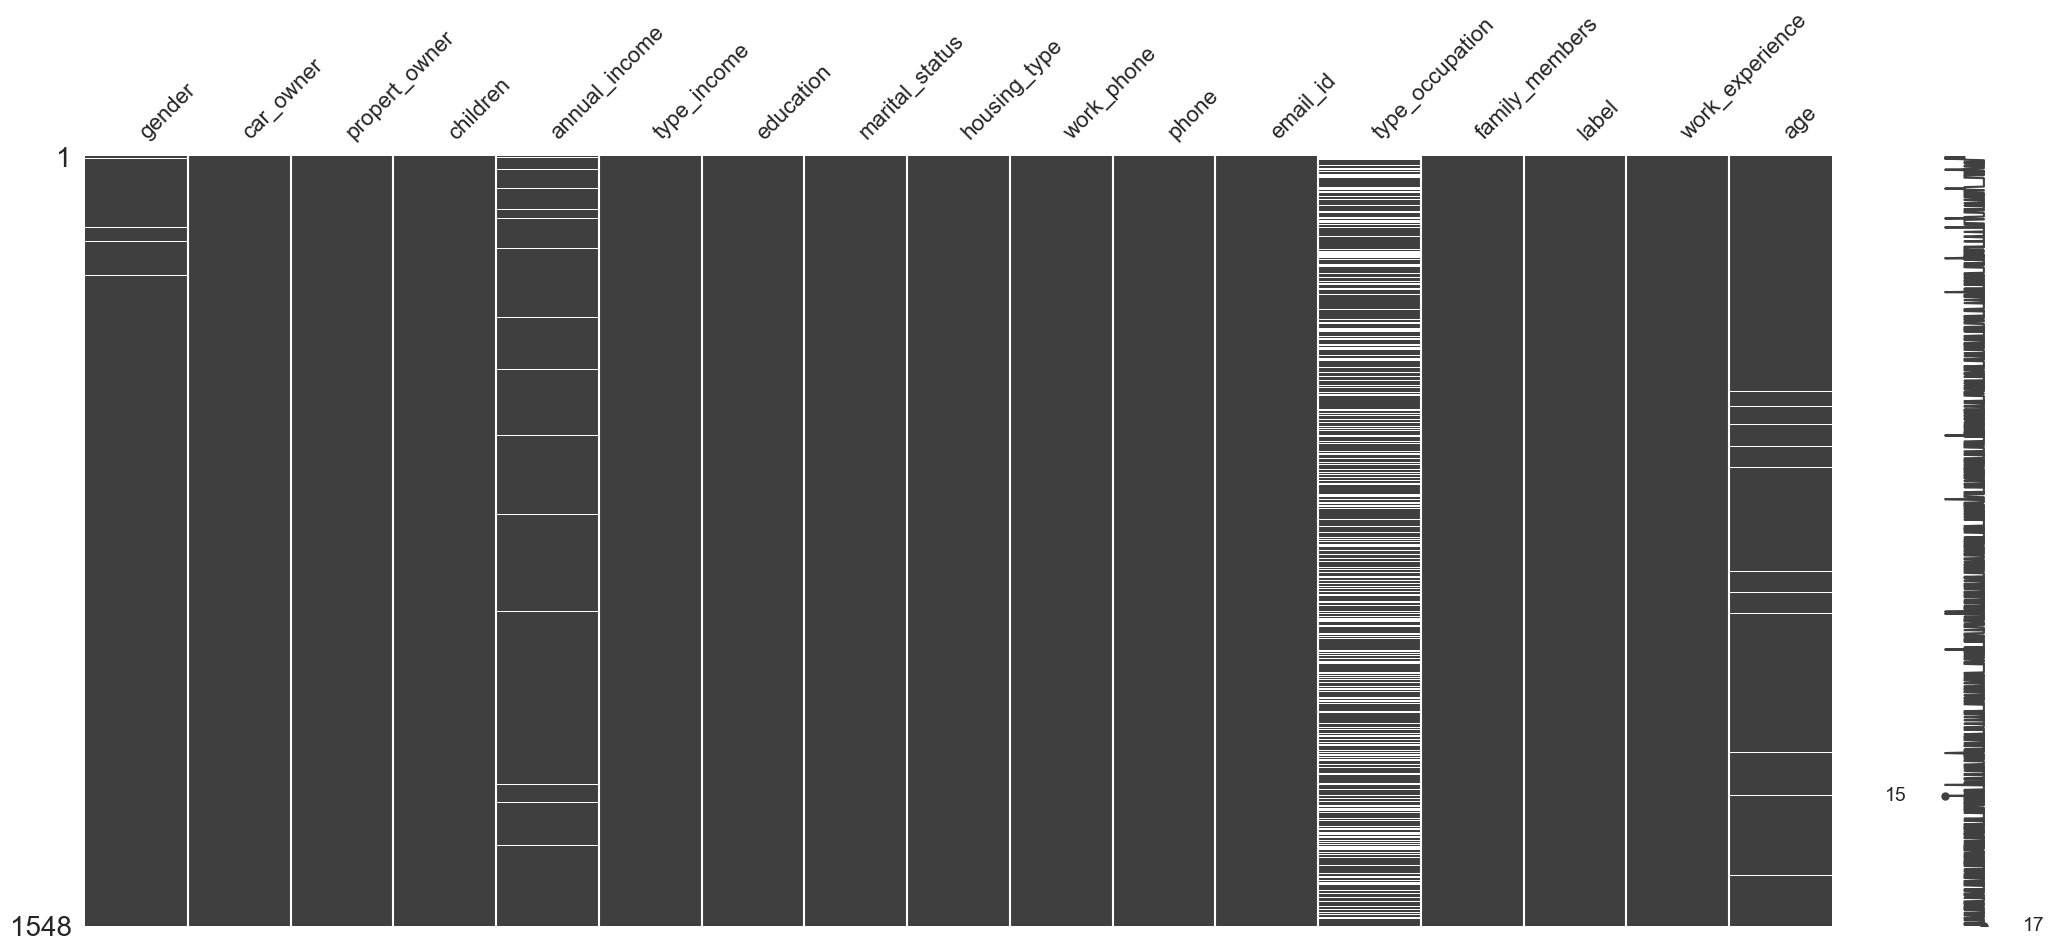

In [44]:
# Shows the location of missing values
msno.matrix(df)

<AxesSubplot: >

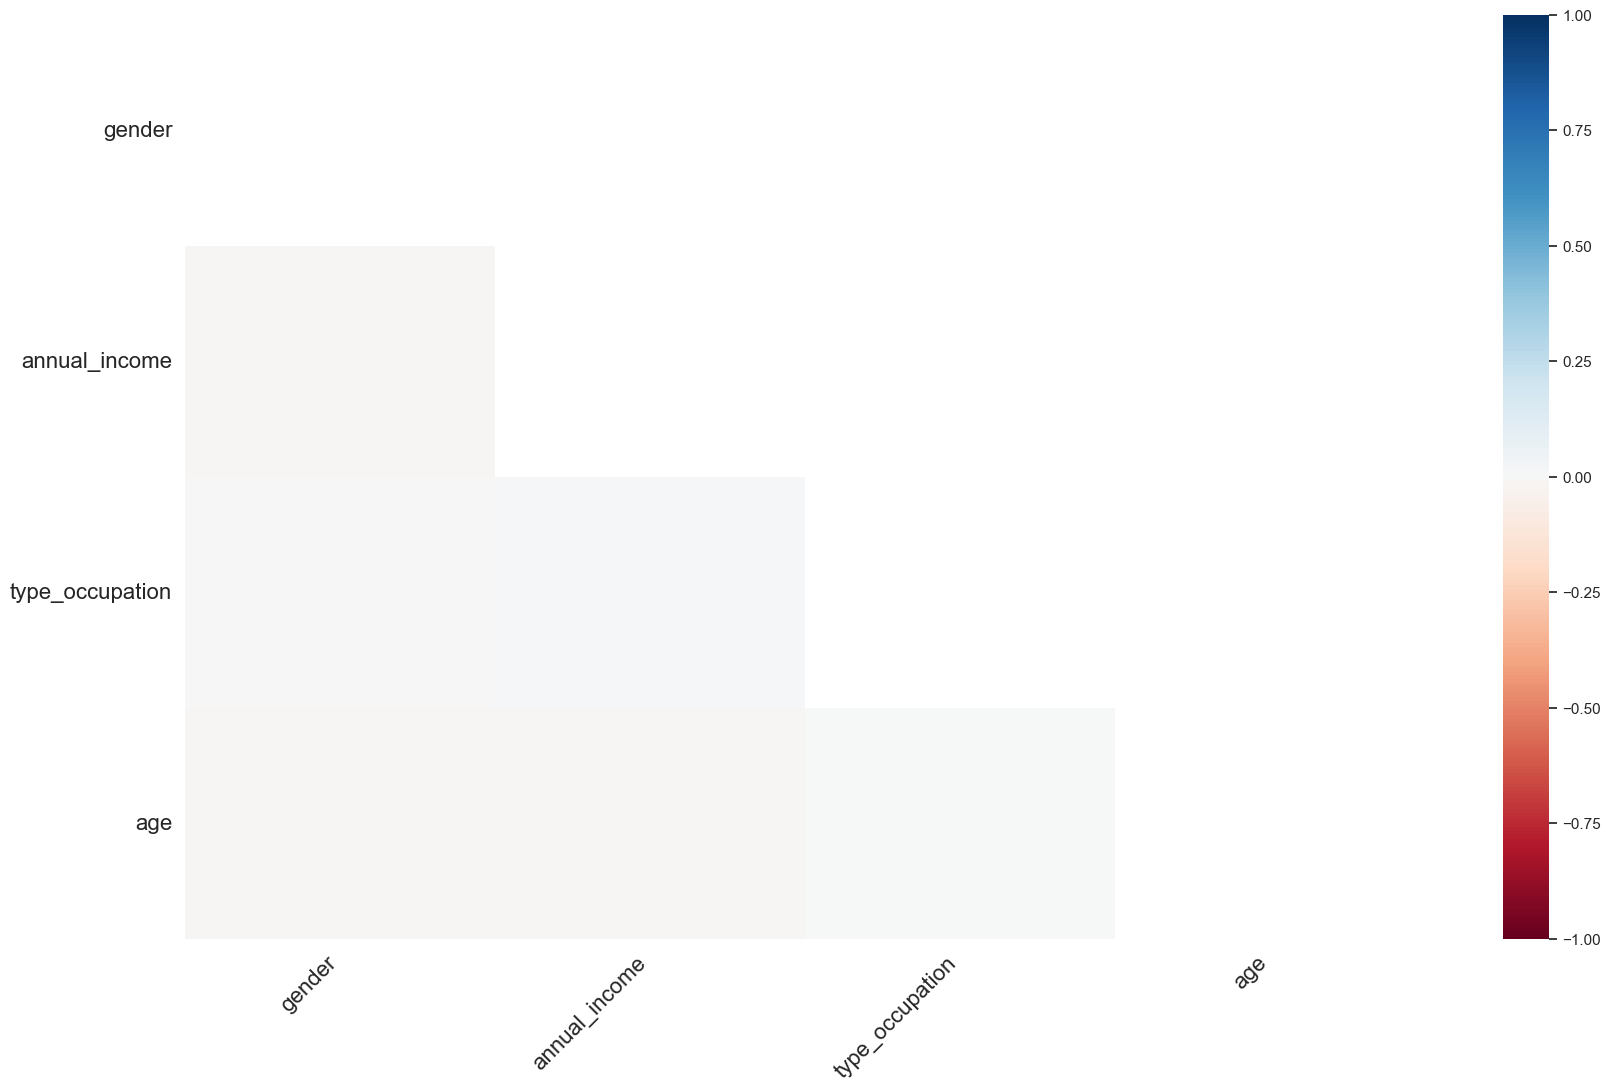

In [45]:
# Shows relation between missing values
msno.heatmap(df)

The above heatmap shows that there is no correlation between the missing values. So, the data is Missing Completely At Random (MCAR).

Since, missing values in column type_occupations are very high it's better to remove this column from our analysis.

In [46]:
# Deleting the column having max null values
df.drop(columns = 'type_occupation', inplace = True)

In [47]:
# Libraries for model building and performance evaluation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
# Splitting the dataset to avoid data leakage
X = df.drop(columns = 'label')
y = df['label']

In [49]:
# Splitting training and testing dataset, considering 20% data for testing with random state as 0, for reproducible results
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 108, stratify = y)

In [50]:
print(f"Percentage of missing data in Training dataset:\n{x_train.isnull().mean()*100}\n\n")
print(f"Percentage of missing data in Testing dataset:\n{x_test.isnull().mean()*100}")

Percentage of missing data in Training dataset:
gender             0.565428
car_owner          0.000000
propert_owner      0.000000
children           0.000000
annual_income      1.373183
type_income        0.000000
education          0.000000
marital_status     0.000000
housing_type       0.000000
work_phone         0.000000
phone              0.000000
email_id           0.000000
family_members     0.000000
work_experience    0.000000
age                1.453958
dtype: float64


Percentage of missing data in Testing dataset:
gender             0.000000
car_owner          0.000000
propert_owner      0.000000
children           0.000000
annual_income      1.935484
type_income        0.000000
education          0.000000
marital_status     0.000000
housing_type       0.000000
work_phone         0.000000
phone              0.000000
email_id           0.000000
family_members     0.000000
work_experience    0.000000
age                1.290323
dtype: float64


# observation 
Since, Missing data in all the columns is less than 2% so we can use simple imputation techiniques.

We will impute missing gender by most frequent category (i.e mode), annual_income with its median value because it is right-skewed, and missing data in age will be replaced by its mean, since it is normally distributed.

# Imputation in Training Data

In [51]:
# Imputing gender column with Most frequent Categories
x_train['gender'].fillna(x_train['gender'].mode()[0] , inplace=True)

In [52]:
# Imputing annual_income column with its median value
x_train['annual_income'].fillna(round(x_train['annual_income'].median()), inplace = True)

In [53]:
# Imputing age column with its mean
x_train['age'].fillna(round(x_train['age'].mean()), inplace = True)

In [54]:
# Checking the dataset
x_train.isnull().sum()

gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
work_phone         0
phone              0
email_id           0
family_members     0
work_experience    0
age                0
dtype: int64

# Imputation in Test data

In [55]:
# Imputing gender column with Most frequent Categories
x_test['gender'].fillna(x_test['gender'].mode()[0], inplace = True)

In [56]:
# Imputing annual_income column with its median value
x_test['annual_income'].fillna(round(x_test['annual_income'].median()), inplace = True)

In [57]:
# Imputing age column with its mean
x_test['age'].fillna(round(x_test['age'].mean()), inplace = True)

In [58]:
x_test.isnull().sum()

gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
work_phone         0
phone              0
email_id           0
family_members     0
work_experience    0
age                0
dtype: int64

## Merging cleaned data and exporting to csv file for analysis in SQL

In [59]:
# Merging features and target variable of training data
train_data_cleaned = pd.concat([x_train, y_train], axis = 1)

In [60]:
# Merging features and target variable of test data
test_data_cleaned = pd.concat([x_test, y_test], axis = 1)

In [61]:
# Merging cleaned train and test set
df_cleaned = pd.concat([train_data_cleaned, test_data_cleaned], axis = 0).sort_index()

In [62]:
# Exporting to csv file
credit_data_cleaned = df_cleaned.to_csv('credit_data_cleaned.csv', index = True)

In [63]:
# Dropping the index
x_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

x_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

# Encoding Categorical data and Feature Transformation
Now, that we have imputed all the missing values we will move forward in our analysis by encoding categorical data.

Encoding of categorical data is an important part of data preprocessing because most of the Machine Leaning algorithms cannot handle categorical data directly, so it is required to transform them.

There are several techniques of encoding categorical data, some of them are discussed below:

1. One-Hot Encoding: In this technique, for each category of a feature, we create a new column (sometimes called a dummy variable) with binary encoding (0 or 1) to denote whether a particular row belongs to this category. It increases dimensionality of data, and can lead to sparse dataset if the number of categories in a column is high.
2. Label Encoding: In this technique, each category is assigned a unique integer value based on its alphabetical or numerical order.
3. Ordinal Encoding: Ordinal encoding is a variation of label encoding, where the labels are assigned based on the order of the categories. In this technique, each category is assigned a unique integer label based on its order.
4. Binary Encoding: It is a combination of label encoding and one-hot encoding. In this technique each category is first converted to a numeric value, and then that numeric value is converted into binary form. It is more preferred when we have higher categories.

Here, we will use Ordinal Encoding for education and Label Encoding for rest of the categorical features

In [64]:
# Assigning order of education for encoding
edu_category = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']

In [65]:
# Storing encoding classes to objects
ode = OrdinalEncoder(categories=[edu_category])

In [66]:
# Transforming and modifying the variables in training set
x_train['education'] = ode.fit_transform(x_train[['education']])

In [67]:
# Checking training data
x_train.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,F,N,Y,0,157500.0,State servant,1.0,Widow,House / apartment,0,1,0,1,6.0,63.0
1,F,Y,Y,2,121500.0,Working,2.0,Married,House / apartment,1,1,0,4,1.0,32.0
2,F,N,N,0,306000.0,Commercial associate,3.0,Married,House / apartment,0,0,0,2,4.0,30.0
3,M,N,N,0,135000.0,Working,1.0,Married,House / apartment,1,0,0,2,4.0,29.0
4,F,Y,Y,0,157500.0,Commercial associate,3.0,Single / not married,House / apartment,0,0,0,1,4.0,44.0


In [68]:
# Transforming and modifying the variable in test set
x_test['education'] = ode.transform(x_test[['education']])

In [69]:
# Checking the test data
x_test.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,M,N,Y,0,157500.0,Working,2.0,Married,House / apartment,1,1,0,2,2.0,38.0
1,M,N,N,2,171000.0,Working,1.0,Married,Municipal apartment,1,1,0,4,16.0,38.0
2,F,N,Y,0,112500.0,Pensioner,1.0,Widow,House / apartment,0,0,0,1,0.0,63.0
3,M,Y,Y,0,90000.0,Working,1.0,Married,House / apartment,1,1,0,2,15.0,33.0
4,M,Y,N,1,157500.0,Working,1.0,Married,House / apartment,0,1,0,3,6.0,36.0


In [70]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [71]:
# Columns to one-hot encode
cols_to_encode = ['type_income', 'marital_status', 'housing_type', 'gender', 'car_owner', 'propert_owner']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(x_train[cols_to_encode])

# Create a new DataFrame with one-hot encoded columns
x_train_encoded = pd.concat([x_train, pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cols_to_encode))], axis=1)

# Drop the original columns that were one-hot encoded
x_train_encoded = x_train_encoded.drop(cols_to_encode, axis=1)


In [72]:
x_train_encoded[['work_phone' , 'phone']] = x_train_encoded[['work_phone' , 'phone']].astype(int)

In [73]:
# Columns to one-hot encode in the test data
cols_to_encode_test = ['type_income', 'marital_status', 'housing_type', 'gender', 'car_owner', 'propert_owner']

# Transform the specified columns in the test data
encoded_columns_test = encoder.transform(x_test[cols_to_encode_test])

# Create a new DataFrame with one-hot encoded columns for the test data
x_test_encoded = pd.concat([x_test, pd.DataFrame(encoded_columns_test, columns=encoder.get_feature_names_out(cols_to_encode_test))], axis=1)

# Drop the original columns that were one-hot encoded in the test data
x_test_encoded = x_test_encoded.drop(cols_to_encode_test, axis=1)

# Display the head of the x_test_encoded DataFrame
x_test_encoded.head()

,children,annual_income,education,work_phone,phone,email_id,family_members,work_experience,age,type_income_Pensioner,...,marital_status_Single / not married,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,gender_M,car_owner_Y,propert_owner_Y
0,0,157500.0,2.0,1,1,0,2,2.0,38.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,171000.0,1.0,1,1,0,4,16.0,38.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,112500.0,1.0,0,0,0,1,0.0,63.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,90000.0,1.0,1,1,0,2,15.0,33.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1,157500.0,1.0,0,1,0,3,6.0,36.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [74]:
x_test_encoded[['work_phone' , 'phone' , 'email_id']] = x_test_encoded[['work_phone' , 'phone' , 'email_id']].astype(float)

# Treating the Outliers
As we have imputed the missing values and encoded the categorical data, now we will treat the outliers in the dataset. In the distribution of numerical features, we have seen that annual_income and work_experience have skewed data. So, we need to apply some transformations to make them normally distributed.

There are several transformation techniques like: Log Transformation, Square Root Transformation, Power Transformation, Box-Cox and Yeo-Johnson Transformation, etc. Here, Log transformation is applied to annual_income which has large values, and Square Root transformation is applied to work_experience because it has smaller values, so log transformation will make values even more smaller.

## Log Transformation 

In [75]:
# Log transformation on training set
x_train['annual_income'] = np.log(x_train['annual_income'])

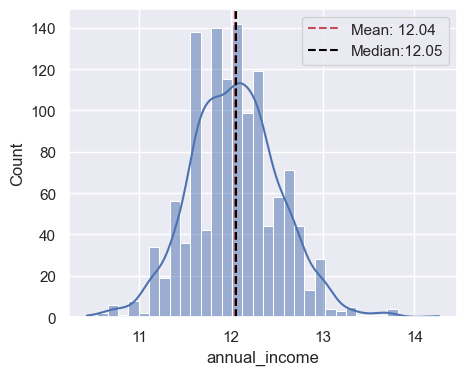

In [76]:
# Visualizing the distribution after transformation in training data
sns.histplot(x = x_train['annual_income'], kde = True)
plt.axvline(x= x_train['annual_income'].mean(), c='r', ls= '--', label = f"Mean: {round(x_train['annual_income'].mean(),2)}")
plt.axvline(x= x_train['annual_income'].median(), c='black', ls= '--', label = f"Median:{round(x_train['annual_income'].median(),2)}")
plt.legend()
plt.show()

In [77]:
# Checking the skewness
x_train['annual_income'].skew()

0.20161546899822447

In [78]:
# Log transformation on test set
x_test['annual_income'] = np.log(x_test['annual_income'])

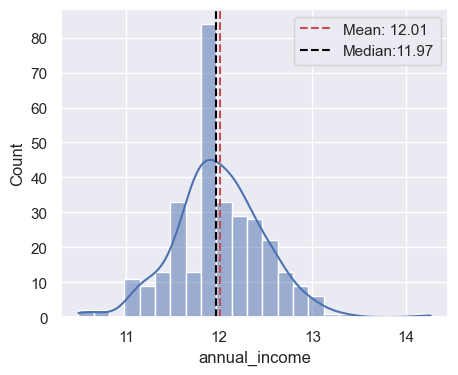

In [79]:
# Visualizing the distributon after transformation in test data
sns.histplot(x = x_test['annual_income'], kde = True)
plt.axvline(x= x_test['annual_income'].mean(), c='r', ls= '--', label = f"Mean: {round(x_test['annual_income'].mean(),2)}")
plt.axvline(x= x_test['annual_income'].median(), c='black', ls= '--', label = f"Median:{round(x_test['annual_income'].median(),2)}")
plt.legend()
plt.show()

In [80]:
x_test['annual_income'].skew()

0.21167656949091002

We can observe that the distribution of data in both datasets is now almost normally distributed.

## Square Root Transformation

In [81]:
# Square Root Transformation
x_train['work_experience'] = np.sqrt(x_train['work_experience'])

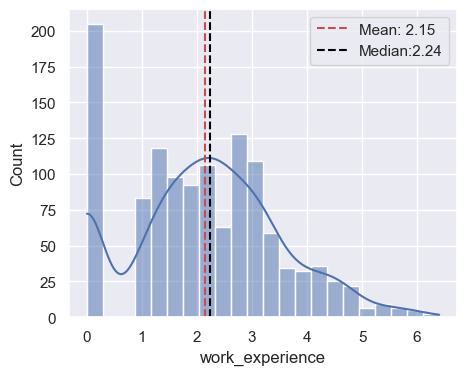

In [82]:
# Visualizing the distribution after transformation in training data
sns.histplot(x = x_train['work_experience'], kde = True)
plt.axvline(x= x_train['work_experience'].mean(), c='r', ls= '--', label = f"Mean: {round(x_train['work_experience'].mean(),2)}")
plt.axvline(x= x_train['work_experience'].median(), c='black', ls= '--', label = f"Median:{round(x_train['work_experience'].median(),2)}")
plt.legend()
plt.show()

In [83]:
# Checking the skewness
x_train['work_experience'].skew()

0.18003713952727257

In [84]:
# Square Root transformation for test data
x_test['work_experience'] = np.sqrt(x_test['work_experience'])

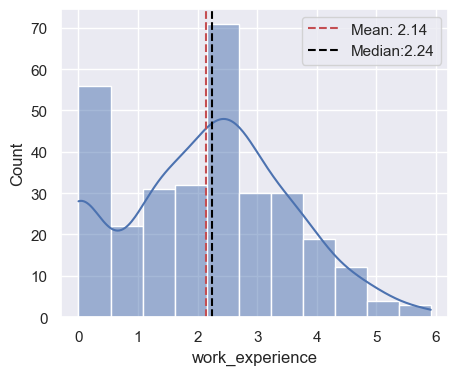

In [85]:
# Visualizing the distribution after transformation
sns.histplot(x = x_test['work_experience'], kde = True)
plt.axvline(x= x_test['work_experience'].mean(), c='r', ls= '--', label = f"Mean: {round(x_test['work_experience'].mean(),2)}")
plt.axvline(x= x_test['work_experience'].median(), c='black', ls= '--', label = f"Median:{round(x_test['work_experience'].median(),2)}")
plt.legend()
plt.show()

In [86]:
# Checking the skewness
x_test['work_experience'].skew()

0.07077718368024657

Now, the distributions seems to be almost normally distributed.

# Handling Imbalance with Data Resampling Techniques
Resampling can help to improve model performance in cases of imbalanced data sets. It creates new samples by selecting data points randomly from the original dataset, and these new samples can be used to estimate the population characteristics of the data or to test the performance of a machine learning model.

There are several techniques of data resampling, which can be broadly classified into two categories:

Undersampling: This involves reducing the number of samples in the majority class to balance the class distribution with the minority class. Drawback of this technique is that it can result in loss of useful information.

Oversampling: This involves increasing the number of samples in the minority class to balance the class distribution with the majority class. This technique may lead to overfitting.

SMOTE (Synthetic Minority Over Sampling)
SMOTE is a commonly used oversampling technique.

SMOTE works by creating synthetic samples of the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the K-Nearest Neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In this project, we're going to balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike Random Over Sampling, SMOTE does not create exact copies of observations, but creates new, synthetic samples that are quite similar to the existing observations in the minority class.

In [87]:
# Defining Resampling method
smote = SMOTE(random_state =0, k_neighbors = 3)

# Fitting and resampling training data values
x_train_sm, y_train_sm = smote.fit_resample(x_train_encoded.values, y_train.values)

In [88]:
x_train_encoded.head()

,children,annual_income,education,work_phone,phone,email_id,family_members,work_experience,age,type_income_Pensioner,...,marital_status_Single / not married,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,gender_M,car_owner_Y,propert_owner_Y
0,0,157500.0,1.0,0,1,0,1,6.0,63.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,121500.0,2.0,1,1,0,4,1.0,32.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,306000.0,3.0,0,0,0,2,4.0,30.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,1.0,1,0,0,2,4.0,29.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,157500.0,3.0,0,0,0,1,4.0,44.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [89]:
# Converting arrays to Pandas Data Structures
x_train_sm = pd.DataFrame(x_train_sm, columns= x_train_encoded.columns)
y_train_sm = pd.Series(y_train_sm)

In [90]:
# Checking the shape of resampled training set
print(x_train_sm.shape)
print(y_train_sm.shape)

(2196, 24)
(2196,)


In [91]:
# Checking resampled value counts
y_train_sm.value_counts()

0    1098
1    1098
dtype: int64

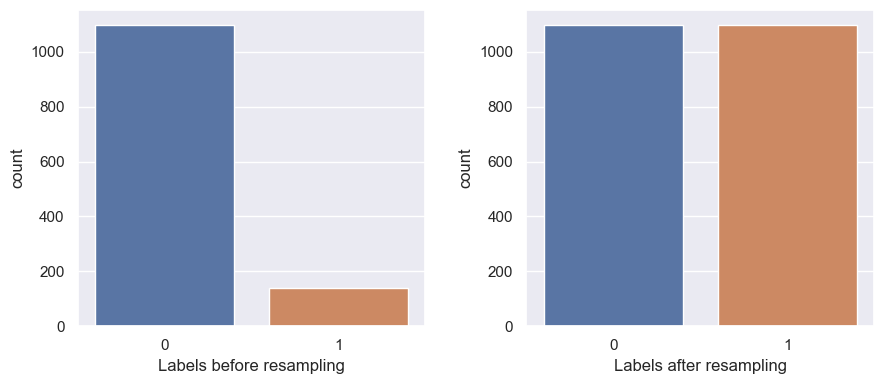

In [92]:
# Visualizing the change in target values for each category

plt.figure(figsize = (9,4))       # Setting the figure size
plt.subplot(121)
sns.countplot(x = y_train)
plt.xlabel("Labels before resampling")

plt.subplot(122)
sns.countplot(x = y_train_sm.astype('category'))
plt.xlabel("Labels after resampling")

plt.tight_layout(w_pad = 2)
plt.show()

# Feature Scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.It is required because many machine learning algorithms are sensitive to the scale of the input features. If the input features have different scales, then some features may dominate the others, and the algorithm may fail to find the optimal solution. Feature scaling ensures that all features contribute equally to the algorithm's decision-making process, and it can improve the accuracy and speed of the machine learning algorithm.

Out of multiple feature scaling techniques, the two most frequently used techniques are:

1. Normalization or Min-Max Scaling: It is the process of scaling numerical data to a range of values between 0 and 1. The new point is calculated as:
 

2. Standardization: It transforms data into a standard normal distribution with a mean of 0 and a standard deviation of 1. The scaled value ranges from -3 to +3.
 

Here, Standard scaling technique is implemented.

In [93]:
# Initializing StandardScaler
scale = StandardScaler()

In [94]:
# Overview of training data
x_train_sm.head()

,children,annual_income,education,work_phone,phone,email_id,family_members,work_experience,age,type_income_Pensioner,...,marital_status_Single / not married,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,gender_M,car_owner_Y,propert_owner_Y
0,0.0,157500.0,1.0,0.0,1.0,0.0,1.0,6.0,63.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,121500.0,2.0,1.0,1.0,0.0,4.0,1.0,32.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,306000.0,3.0,0.0,0.0,0.0,2.0,4.0,30.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,135000.0,1.0,1.0,0.0,0.0,2.0,4.0,29.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,157500.0,3.0,0.0,0.0,0.0,1.0,4.0,44.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [95]:
# Storing Numerical columns needed to be scaled in a list
cols =['annual_income', 'age', 'work_experience']

In [96]:
# Replacing original values with scaled values in training set
x_train_sm[cols] = pd.DataFrame(scale.fit_transform(x_train_sm[cols]), 
                             columns = cols, index = x_train_sm.index)

In [97]:
# Viewing the training data after scaling
x_train_sm.head()

,children,annual_income,education,work_phone,phone,email_id,family_members,work_experience,age,type_income_Pensioner,...,marital_status_Single / not married,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,gender_M,car_owner_Y,propert_owner_Y
0,0.0,-0.363346,1.0,0.0,1.0,0.0,1.0,0.107815,1.597016,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,-0.677935,2.0,1.0,1.0,0.0,4.0,-0.746812,-1.189425,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.934335,3.0,0.0,0.0,0.0,2.0,-0.234036,-1.369195,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.559964,1.0,1.0,0.0,0.0,2.0,-0.234036,-1.459080,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,-0.363346,3.0,0.0,0.0,0.0,1.0,-0.234036,-0.110803,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [98]:
# Replacing original values with scaled values in test set
x_test_encoded[cols] = pd.DataFrame(scale.transform(x_test_encoded[cols]), 
                             columns = cols, index = x_test.index)

In [99]:
# Viewing the test data
x_test_encoded.head()

,children,annual_income,education,work_phone,phone,email_id,family_members,work_experience,age,type_income_Pensioner,...,marital_status_Single / not married,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,gender_M,car_owner_Y,propert_owner_Y
0,0,-0.363346,2.0,1.0,1.0,0.0,2,-0.575886,-0.650114,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,-0.245375,1.0,1.0,1.0,0.0,4,1.817068,-0.650114,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,-0.756582,1.0,0.0,0.0,0.0,1,-0.917737,1.597016,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,-0.953200,1.0,1.0,1.0,0.0,2,1.646142,-1.099539,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1,-0.363346,1.0,0.0,1.0,0.0,3,0.107815,-0.829884,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Model Building and Performance Evaluation
Now, as we have done the required data preprocessing, let's proceed further to building Machine Learning models. In this project, several machine learning models are build using different classification algorithms and performance is optimized by performing Hyperparameter Tuning. The results obtained from each algorithm are then summarized.

# Performance Evaluation Metrics
There are different metrics to evaluate the predictive performance of a Machine Learning model. These includes: Accuracy Score, Precision, Recall, F1 score, ROC-AUC score.

In our case to make more accurate predictions for rejected applications which will help banks to control fraudulent activities, we need to have increased True Positives (correctly predicted rejected applications) and minimum False Negatives (wrongly predicted actual rejected applications), i.e., we need to focus more on the recall score.

## Accuracy:
Accuracy measures the correct predictions made by a model out of total predictions made. Accuracy is not a reliable metric when working with imbalanced data because even if the model predicts everything as the majority class, a higher accuracy is obtained which is actually useless.
  
 ## Precision and Recall:
1. Precision is the fraction of true positive results (i.e., the number of correctly identified positive instances) among all instances classified as positive. Precision measures how accurate the positive predictions are, and it is calculated 
                        # True positive
    Precision   =   -----------------------------
                    # True positive +  # False positive 
        

2. Recall is the fraction of true positive results among all actual positive instances (i.e., the number of correctly identified positive instances divided by the total number of positive instances in the dataset). Recall measures how well the model is able to identify all positive instances. It is calculated as:
                        # True positive
    Recall   =   -----------------------------
                    # True positive +  # False  negative
        

## ROC-AUC Score:
3. Created by plotting the true positive rate against the false positive rate at various threshold settingsUseful for comparing performance of different algorithms
 It is a more reliable metric than accuracy in case of imbalanced data.


# 1. Logistic Regression Model
First, we will train the Logistic Regression Model on the resampled dataset, and then we will predict the values for the test dataset which has imbalance.

In [100]:
# Defining the Logistic Regression Model
clf1 = LogisticRegression(max_iter= 1000, C=1)

In [101]:
# Training the model on resampled data
clf1.fit(x_train_sm, y_train_sm)

LogisticRegression(C=1, max_iter=1000)

In [102]:
# Accuracy Score for training data
clf1.score(x_train_sm, y_train_sm)

0.6434426229508197

In [103]:
x_train_sm.dtypes

children                               float64
annual_income                          float64
education                              float64
work_phone                             float64
phone                                  float64
email_id                               float64
family_members                         float64
work_experience                        float64
age                                    float64
type_income_Pensioner                  float64
type_income_State servant              float64
type_income_Working                    float64
marital_status_Married                 float64
marital_status_Separated               float64
marital_status_Single / not married    float64
marital_status_Widow                   float64
housing_type_House / apartment         float64
housing_type_Municipal apartment       float64
housing_type_Office apartment          float64
housing_type_Rented apartment          float64
housing_type_With parents              float64
gender_M     

In [104]:
x_test_encoded.dtypes

children                                 int64
annual_income                          float64
education                              float64
work_phone                             float64
phone                                  float64
email_id                               float64
family_members                           int64
work_experience                        float64
age                                    float64
type_income_Pensioner                  float64
type_income_State servant              float64
type_income_Working                    float64
marital_status_Married                 float64
marital_status_Separated               float64
marital_status_Single / not married    float64
marital_status_Widow                   float64
housing_type_House / apartment         float64
housing_type_Municipal apartment       float64
housing_type_Office apartment          float64
housing_type_Rented apartment          float64
housing_type_With parents              float64
gender_M     

In [105]:
x_test_encoded.isnull().sum()

children                               0
annual_income                          0
education                              0
work_phone                             0
phone                                  0
email_id                               0
family_members                         0
work_experience                        0
age                                    0
type_income_Pensioner                  0
type_income_State servant              0
type_income_Working                    0
marital_status_Married                 0
marital_status_Separated               0
marital_status_Single / not married    0
marital_status_Widow                   0
housing_type_House / apartment         0
housing_type_Municipal apartment       0
housing_type_Office apartment          0
housing_type_Rented apartment          0
housing_type_With parents              0
gender_M                               0
car_owner_Y                            0
propert_owner_Y                        0
dtype: int64

In [106]:
# Predicting results for test data
y_pred = clf1.predict(x_test_encoded)

# Performance Evaluation of Logistic Regression Model

In [107]:
# Evaluating the baseline accuracy

accepted = [i for i in y_test if i==0]
count_accepted = len(accepted)

total_obs = len(y_test)

percentage = count_accepted/total_obs * 100
print("Baseline Accuracy: %.2f" %percentage)

Baseline Accuracy: 88.71


This tells us that if our model predicts only majority class, we would be correct in 88.6% of the cases. If we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct.

With highly imbalanced data, the AUC-ROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells us about the precision and recall of our model, and the confusion matrix actually shows how many rejected cases you can predict correctly. So let's evaluate the performance of our model.

In [108]:
# Accuracy score for test data
print("Accuracy Score for Logistic Regression:",accuracy_score(y_test, y_pred))

Accuracy Score for Logistic Regression: 0.6451612903225806


In [109]:
# Classification report to evaluate different performance metrics
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       275
           1       0.16      0.49      0.24        35

    accuracy                           0.65       310
   macro avg       0.53      0.58      0.50       310
weighted avg       0.83      0.65      0.71       310



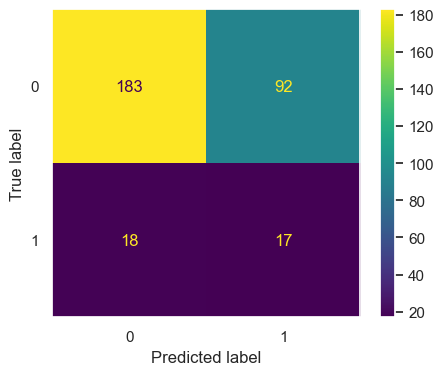

In [110]:
# Confusion Matrix for overview of incorrect predictions
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

The model predicts 109 cases of rejected applications, out of which 17 are actually rejected. We got a  high number of False Positives. This is not a very good performing model, and as a result we have a very low precision score. The model also failed to correctly classify 18 actually rejected applications.

Let's also view the ROC-AUC curve for this model.

In [111]:
# Defining ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5755844155844156


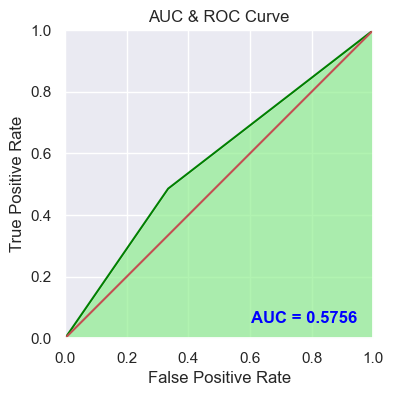

In [112]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Here, we get AUC score of 0.6077. Now, let's try to improve the performance of this model by optimizing the Hyperparamters.

# Hyperparameter tuning for Logistic Regression

In [113]:
# Initializing the list of hyperparameters to be used for various iterations
param = {'C': [0.001, 0.01, 0.1, 1, 10,15,50, 100, 1000], 
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga', 'sag']}

# Defining GridSearchCV along with 5 fold cross-validation
grid = GridSearchCV(clf1, param_grid = param, cv = 5, scoring = 'roc_auc')
grid

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga',
                                    'sag']},
             scoring='roc_auc')

In [114]:
# Fitting the model in resampled training set
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga',
                                    'sag']},
             scoring='roc_auc')

In [115]:
# Best hyperparameters
grid.best_params_

{'C': 1000, 'solver': 'saga'}

In [116]:
# Best score for training data
grid.best_score_

0.6972719442243103

In [117]:
# Defining the best model evaluated using hyperparameter tuning
clf1_best = grid.best_estimator_

In [118]:
# Training the model
clf1_best.fit(x_train_sm, y_train_sm)

LogisticRegression(C=1000, max_iter=1000, solver='saga')

In [120]:
# Predicting Results for test set
y_pred= clf1_best.predict(x_test_encoded)

# Performance Evaluation after Hyperparameter Tuning

In [121]:
# Accuracy Score
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.6580645161290323


In [122]:
# Printing the classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       275
           1       0.16      0.46      0.23        35

    accuracy                           0.66       310
   macro avg       0.53      0.57      0.51       310
weighted avg       0.82      0.66      0.72       310



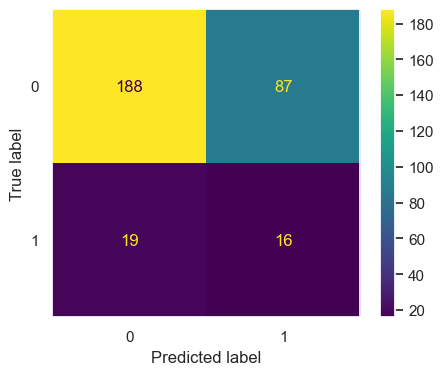

In [123]:
# Confusion Matrix for overview of incorrect predictions
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

In [124]:
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:",auc)

AUC Score: 0.5703896103896103


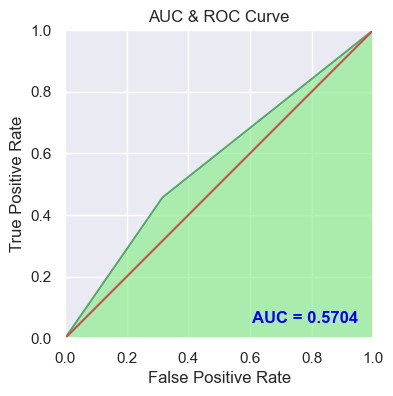

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# 2. Support Vector Classifier

In [126]:
# Defining the model
clf2 = SVC(gamma = 1)

In [127]:
# Training the model
clf2.fit(x_train_sm, y_train_sm)

SVC(gamma=1)

In [129]:
# Predicting the results on test set
y_pred =clf2.predict(x_test_encoded)

In [131]:
# Checking the Accuracy of the model
print("Accuracy Score:",clf2.score(x_test_encoded, y_test))

Accuracy Score: 0.9129032258064517


In [132]:
# Printing the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       275
           1       0.67      0.46      0.54        35

    accuracy                           0.91       310
   macro avg       0.80      0.71      0.75       310
weighted avg       0.90      0.91      0.91       310



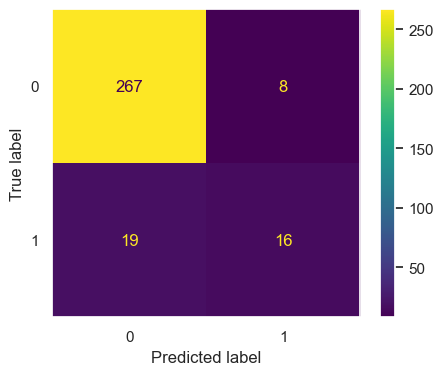

In [133]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

The model predicts 24 cases of rejected applications, out of which 16 are actually rejected. We got a much lower number of False Positives this time which increased the precision. However, the number of False Negatives are same .

In [134]:
# AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:",auc)

AUC Score: 0.714025974025974


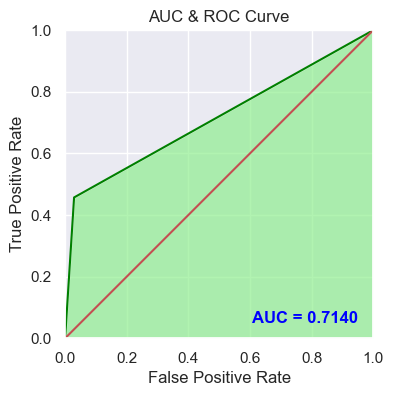

In [135]:
# Visualizing ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Now, let's try to optimize the model's performance by tuning the hyperparameters.

# Hyperparameter Tuning and Performance Evaluation for SVC

In [136]:
param= {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [0.1,1,10,100,500,1000],
    'gamma': ['auto'],
    'decision_function_shape': ['ovr', 'ovo']
}

In [137]:
# Defining the Randomized Search with pre-defined iterations
grid = RandomizedSearchCV(clf2, param, cv=5, n_iter = 10, n_jobs =-1)

In [138]:
#Fitting the model to train set
grid.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=SVC(gamma=1), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 500, 1000],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'gamma': ['auto'],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [139]:
# Best score for a specific set of hyperparameters
grid.best_score_

0.9094170635742389

In [140]:
# Best hyperparameters from the given dictionary
grid.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'decision_function_shape': 'ovr', 'C': 1000}

In [141]:
# Storing the classifier to an object
clf2_best = grid.best_estimator_

In [142]:
# Training the model
clf2_best.fit(x_train_sm, y_train_sm)

SVC(C=1000, gamma='auto')

In [143]:
# Predicting the results
y_pred = clf2_best.predict(x_test_encoded)

In [144]:
# Checking the Accuracy
print("Accuracy Score:", clf2_best.score(x_test_encoded, y_test))

Accuracy Score: 0.8806451612903226


In [145]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       275
           1       0.47      0.54      0.51        35

    accuracy                           0.88       310
   macro avg       0.71      0.73      0.72       310
weighted avg       0.89      0.88      0.88       310



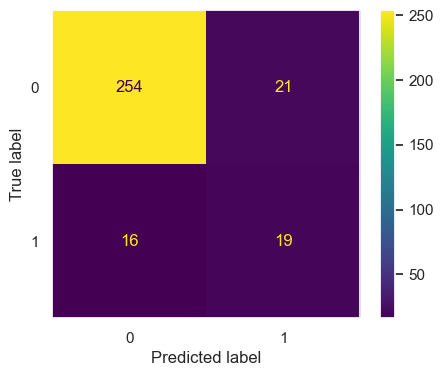

In [146]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

So, after hyperparameter tuning, the model predicts total 30 cases of rejected applications, out of which 19 are actually rejected. Here less False positives compared to the previous model. However, the number of False Negatives are now decreased and therefore, recall score is improved. Let's check AUC score also.

In [147]:
# Checking the AUC score
auc = roc_auc_score(y_test, y_pred)
auc

0.7332467532467531

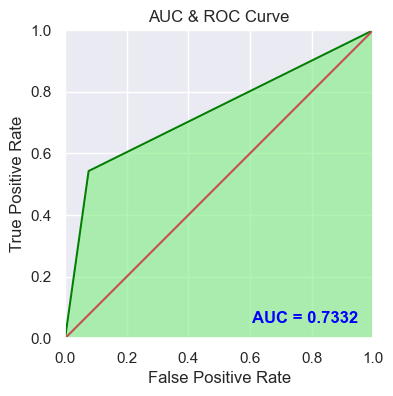

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The model performance is slightly improved and we are now getting an AUC score of 0.7332

# 3. Decision Tree Classifier

In [149]:
# Defining the model 
clf3 = DecisionTreeClassifier(max_depth = 15, random_state = 10)

In [150]:
# Training the model on resampled dataset
clf3.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=15, random_state=10)

In [151]:
# Predicting the test set results
y_pred = clf3.predict(x_test_encoded)

In [153]:
# Checking the accuracy
print("Accuracy Score:",clf3.score(x_test_encoded, y_test))

Accuracy Score: 0.8580645161290322


In [154]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       275
           1       0.38      0.43      0.41        35

    accuracy                           0.86       310
   macro avg       0.66      0.67      0.66       310
weighted avg       0.87      0.86      0.86       310



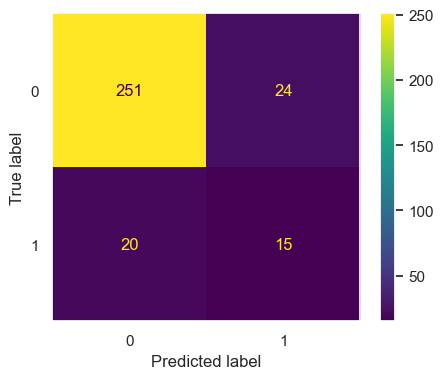

In [155]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()


In this case, the model predicts total 39 cases of rejected applications, out of which 15 are actually rejected. We got 24 False Positives this time and 20 False Negatives.

Let's also view the ROC-AUC curve for this model.

In [156]:
#Let's also view the ROC-AUC curve for this model.
# Checking the AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.6706493506493506

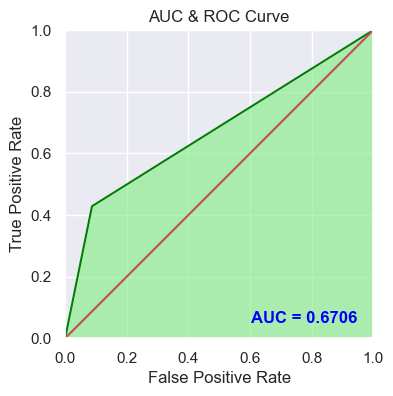

In [157]:
# Visualizing the ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Hyperparameter Tuning for Decision Tree Classifier

In [158]:
# Defining the hyperparameters to be tested
params = {
    'max_depth': [5,10,15,20,25,30,50,75,80,100,200,500,1000],
    'criterion': ['gini', 'entropy']
}

In [159]:
# Storing model in GridSearchCV to test model performance at different hyperparameters
grid = GridSearchCV(clf3, params, cv=5, scoring = 'roc_auc')

In [160]:
# Training the model
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=15, random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 50, 75, 80, 100,
                                       200, 500, 1000]},
             scoring='roc_auc')

In [161]:
# Best hyperparameters
grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [162]:
# Storing the classifier to an object
clf3_best = grid.best_estimator_

In [163]:
# Training the model
clf3_best.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [165]:
# Predicting the test results
y_pred = clf3_best.predict(x_test_encoded)

In [167]:
# Accuracy Score
print("Accuracy:",clf3_best.score(x_test_encoded, y_test))


Accuracy: 0.864516129032258


In [168]:
# Classification Report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       275
           1       0.38      0.31      0.34        35

    accuracy                           0.86       310
   macro avg       0.65      0.62      0.63       310
weighted avg       0.85      0.86      0.86       310



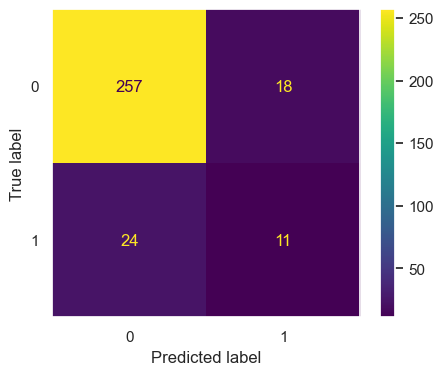

In [169]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

not much change

In [170]:
# Checking the AUC score
auc = roc_auc_score(y_test, y_pred)
auc

0.6244155844155845

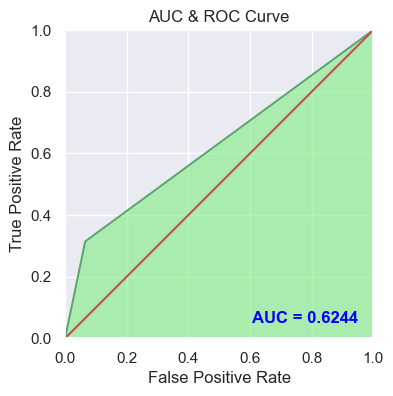

In [171]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# 4. Random Forest Classifier

In [172]:
# Defining the Classifier
clf4 = RandomForestClassifier(n_estimators =15, oob_score = True,random_state = 0)

In [173]:
# Training the model
clf4.fit(x_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=15, oob_score=True, random_state=0)

In [174]:
# Predicting the results
y_pred = clf4.predict(x_test_encoded)

In [176]:
# Accuracy Score
print("Accuracy Score:",clf4.score(x_test_encoded, y_test))

Accuracy Score: 0.9161290322580645


In [178]:
# Classification Report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       275
           1       0.71      0.43      0.54        35

    accuracy                           0.92       310
   macro avg       0.82      0.70      0.74       310
weighted avg       0.91      0.92      0.91       310



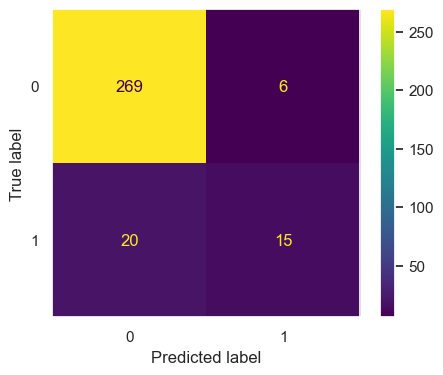

In [179]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

The Random Forest model when trained using 15 estimators, predicts 21 rejected applications out of which 15 were actually rejected. The number of False Positive is less which increased the precision. However, the number of False Negatives is more

In [180]:
# Checking the AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.7033766233766234

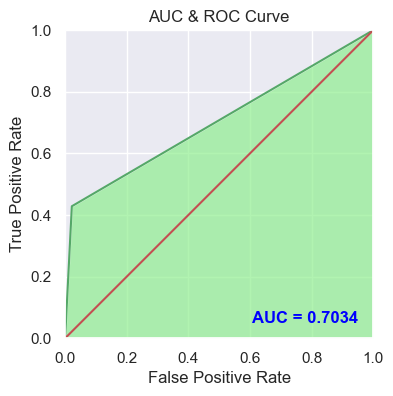

In [181]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Hyperparameter Tuning for Random Forest Classifier

In [182]:
# Defining the hyperparameters to be tested
params = {
    'n_estimators' : [5,10,15,20,30,50,80,100,500,1000],
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 10, 12, 20, 50, 100, 500]
}

In [183]:
# Storing model in GridSearchCV to test model performance at different hyperparameters
grid = GridSearchCV(clf4, params, cv=5, n_jobs = -1, scoring ='roc_auc')

In [184]:
# Training the model
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=15, oob_score=True,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, 20, 50, 100, 500],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 80, 100, 500,
                                          1000]},
             scoring='roc_auc')

In [185]:
# Generating Best accuracy score
grid.best_score_

0.9803887882561606

In [186]:
# Best hyperparameters from the defined dictionary
grid.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100}

In [187]:
# Storing the classifier with new hyperparameters
clf4_best = grid.best_estimator_

In [188]:
# Training the model
clf4_best.fit(x_train_sm, y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=12, oob_score=True,
                       random_state=0)

In [190]:
# Predicting the results
y_pred = clf4_best.predict(x_test_encoded)

In [192]:
# Checking the Accuracy
print("Accuracy:",clf4_best.score(x_test_encoded, y_test))

Accuracy: 0.9


In [193]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       275
           1       0.67      0.23      0.34        35

    accuracy                           0.90       310
   macro avg       0.79      0.61      0.64       310
weighted avg       0.88      0.90      0.88       310



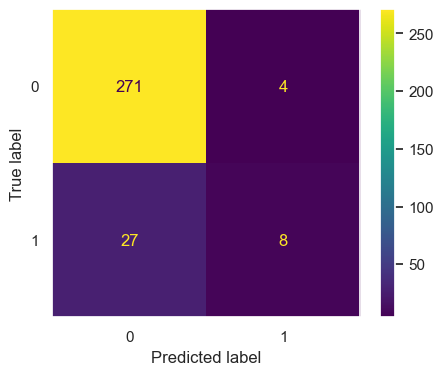

In [194]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

In [195]:
#Checking the AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.6070129870129871

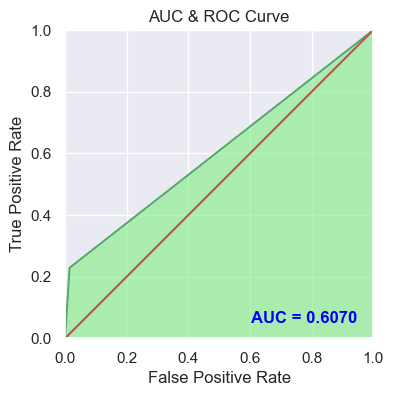

In [196]:
# Visualizing the ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# 5. XGBoost Classifier

In [197]:
# Initializing XGBoost Classifier
xgb = XGBClassifier(random_state =0)

In [198]:
# Fitting the model
xgb.fit(x_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [200]:
# Predicting the test results
y_pred = xgb.predict(x_test_encoded)

In [202]:
# Checking the Accuracy
print("Accuracy:",xgb.score(x_test_encoded, y_test))

Accuracy: 0.9129032258064517


In [203]:
# Claassification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       275
           1       0.65      0.49      0.56        35

    accuracy                           0.91       310
   macro avg       0.80      0.73      0.75       310
weighted avg       0.90      0.91      0.91       310



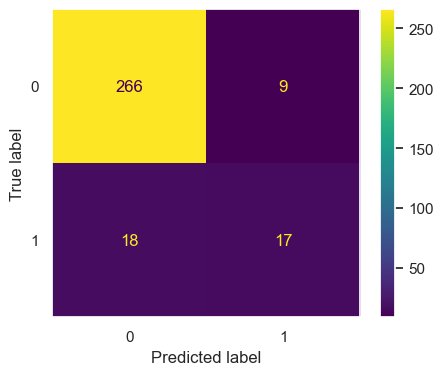

In [204]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

Model predicts 26 rejected application, out of which 17 are actually rejected. False Negative values are more.

In [205]:
# Checking AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.7264935064935065

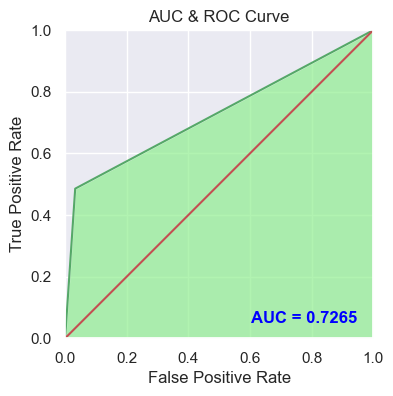

In [206]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Hyperparameter Tuning for XGBoost

In [207]:
# Defining the hyperparameters 
params = {
    'eta': [0.1,0.5,1,1.5,2,3,5,10,15,20,30,50,100],
    'gamma': [0, 0.3, 0.5, 0.8, 1, 2, 5, 10, 15,30, 50,100],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'max_depth' : [0,10,15,20,30,50,75,100,200,1000]
}

In [208]:
# Defining RandomizedSearch for faster processing with 30 iterations
grid = RandomizedSearchCV(xgb, params, n_iter = 30, n_jobs = -1, cv=5, random_state = 0, scoring = 'roc_auc')

In [209]:
# Training the model
grid.fit(x_train_sm, y_train_sm)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'eta': [0.1, 0.5, 1, 1.5, 2, 3, 5, 10,
                                                15, 20, 30, 50, 100],
                                        'gamma': [0, 0.3, 0.5, 0.8, 1, 2, 5, 10,
                                                  15, 30, 50, 100],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'max_depth': [0, 10, 15, 20, 30, 50, 75,
                                                      100, 200, 1000]},
                   random_state=0, scoring='roc_auc')

In [210]:
# Best accuracy score
grid.best_score_

0.9731799218838446

In [211]:
# New improved hyperparameters
grid.best_params_

{'max_depth': 1000, 'learning_rate': 0.6, 'gamma': 0, 'eta': 2}

In [212]:
# Storing the new model to object
best_xgb = grid.best_estimator_

In [213]:
# Training the model
best_xgb.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=2, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1000,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [214]:
# Predicting results of test set
y_pred =best_xgb.predict(x_test_encoded)

In [215]:
# Getting the accuracy score
print("Accuracy:",best_xgb.score(x_test_encoded, y_test))

Accuracy: 0.9161290322580645


In [216]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       275
           1       0.68      0.49      0.57        35

    accuracy                           0.92       310
   macro avg       0.81      0.73      0.76       310
weighted avg       0.91      0.92      0.91       310



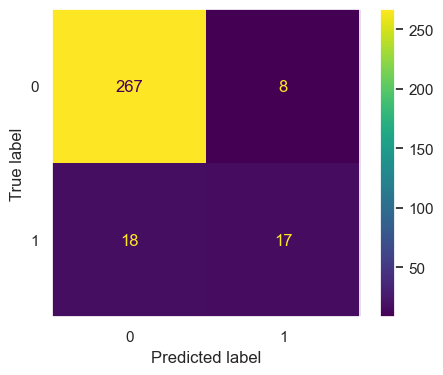

In [217]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

In [218]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7283116883116884

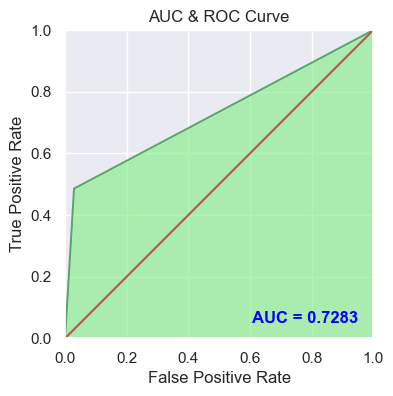

In [219]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# SUMMARY OF RESULTS
After performing all the analysis and evaluating performance of different models, here is the summary of results obtained from all the Machine learning algorithms performed here.

Sr. No.	Algorithms	             Accuracy	AUC Score
1.	Logistic Regression	          0.6580	0.5703
2.	Support Vector Classifier	  0.8806	0.7332
3.	Decision Tree Classifier	  0.8645	0.6244
4.	Random Forest Classifier	  0.9000	0.6070
5.	XGBoost Classifier	          0.9161	0.7283
Based on the ROC-AUC score, the Support Vector Classifier outperforms the other models. However, when considering accuracy, the Random Forest Classifier performs the best.